### Loading Data & Libraries

In [ ]:
import gdown
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [ ]:
# set style visualization
sns.set_style("whitegrid")
sns.set_palette("RdBu")

In [ ]:
# ID file
file_id = '1mas2ax4jH9hLdChR_lplC2kSlbRi06KC'

# Download link
download_link = f'https://drive.google.com/uc?id={file_id}'

# Download file
gdown.download(download_link, 'Adidas_Sales.csv', quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1mas2ax4jH9hLdChR_lplC2kSlbRi06KC
To: /content/Adidas_Sales.csv
100%|██████████| 1.06M/1.06M [00:00<00:00, 23.8MB/s]


'Adidas_Sales.csv'

In [ ]:
data = pd.read_csv('/content/Adidas_Sales.csv')

### Dataset Explanation

•	`Retailer`: Bisnis atau individu yang menjual produk Adidas langsung ke konsumen..

•	`Retailer ID`: ID unik untuk setiap retailer Adidas.

•	`Invoice Date`: Tanggal terjadinya faktur atau transaksi penjualan tertentu.

•	`Region`: Wilayah atau distrik geografis tertentu di mana aktivitas penjualan atau operasi ritel terjadi.

•	`State`: Divisi atau wilayah administratif tertentu dalam suatu negara.

•	`City`: kota tempat aktivitas penjualan atau operasi ritel dilakukan.

•	`Product`: Klasifikasi atau pengelompokan produk Adidas.

•	`Price per Unit`: Biaya atau harga yang terkait dengan satu unit produk.

•	`Units Sold`: Kuantitas atau jumlah unit produk tertentu yang terjual selama transaksi penjualan tertentu.

•	`Total Sales`: Pendapatan keseluruhan yang dihasilkan dari transaksi penjualan.

•	`Operating Profit`: Keuntungan yang diperoleh retailer dari operasi bisnis normalnya.

•	`Sales Method`: Metode penjualan untuk menjual produk Adidas.

### Memperlihatkan sample of data

In [ ]:
data.head()

Retailer  Retailer ID Invoice Date     Region      State         City  \
0        Walmart      1128299    6/17/2021  Southeast    Florida      Orlando   
1      West Gear      1128299    7/16/2021      South  Louisiana  New Orleans   
2  Sports Direct      1197831    8/25/2021      South    Alabama   Birmingham   
3  Sports Direct      1197831    8/27/2021      South    Alabama   Birmingham   
4  Sports Direct      1197831    8/21/2021      South    Alabama   Birmingham   

                   Product Price per Unit Units Sold Total Sales  \
0          Women's Apparel       $103.00         218       2,245   
1          Women's Apparel       $103.00         163       1,679   
2    Men's Street Footwear        $10.00         700       7,000   
3  Women's Street Footwear        $15.00         575       8,625   
4  Women's Street Footwear        $15.00         475       7,125   

  Operating Profit Sales Method  
0          $1,257        Online  
1            $806        Online  
2          $3,150        Outlet  
3          $3,881        Outlet  
4          $3,206        Outlet

In [ ]:
data.shape

(9641, 12)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9641 entries, 0 to 9640
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Retailer          9641 non-null   object
 1   Retailer ID       9641 non-null   int64 
 2   Invoice Date      9641 non-null   object
 3   Region            9641 non-null   object
 4   State             9641 non-null   object
 5   City              9641 non-null   object
 6   Product           9641 non-null   object
 7   Price per Unit    9639 non-null   object
 8   Units Sold        9641 non-null   object
 9   Total Sales       9641 non-null   object
 10  Operating Profit  9641 non-null   object
 11  Sales Method      9641 non-null   object
dtypes: int64(1), object(11)
memory usage: 904.0+ KB


In [ ]:
data.isna().sum()

Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      2
Units Sold          0
Total Sales         0
Operating Profit    0
Sales Method        0
dtype: int64

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.describe(include = object)

Retailer Invoice Date Region       State      City  \
count          9641         9641   9641        9641      9641   
unique            6          724      5          50        52   
top     Foot Locker    1/17/2021   West  California  Portland   
freq           2634           77   2446         430       360   

                      Product Price per Unit Units Sold Total Sales  \
count                    9641           9639       9641        9641   
unique                      7             94        361        1710   
top     Men's Street Footwear        $50.00         225      10,000   
freq                     1610            674        207          66   

       Operating Profit Sales Method  
count              9641         9641  
unique             1530            3  
top             $6,300        Online  
freq                 39         4889

In [ ]:
# drop column yang memiliki missing value di kolom Price per units

data.dropna(subset = "Price per Unit", inplace = True)

In [ ]:
data.isna().sum()

Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Sales Method        0
dtype: int64

## Data Cleaning (Preprocessing )

### Menghapus Kolom yang Tidak Penting

In [ ]:
# drop kolom Retailer ID

data.drop(columns = ['Retailer ID'], inplace = True)

In [ ]:
data.sample(2)

Retailer Invoice Date     Region          State        City  \
6936  West Gear    6/25/2020       West     Washington     Seattle   
503   West Gear    4/17/2021  Northeast  West Virginia  Charleston   

                      Product Price per Unit Units Sold Total Sales  \
6936    Men's Street Footwear        $75.00         750      56,250   
503   Women's Street Footwear        $20.00         250       5,000   

     Operating Profit Sales Method  
6936         $16,875      In-store  
503           $2,000      In-store

### Analisis Kolom `Retailer`

In [ ]:
data['Retailer'].unique()

array(['Walmart', 'West Gear', 'Sports Direct', 'Foot Locker', 'Amazon',
       "Kohl's"], dtype=object)

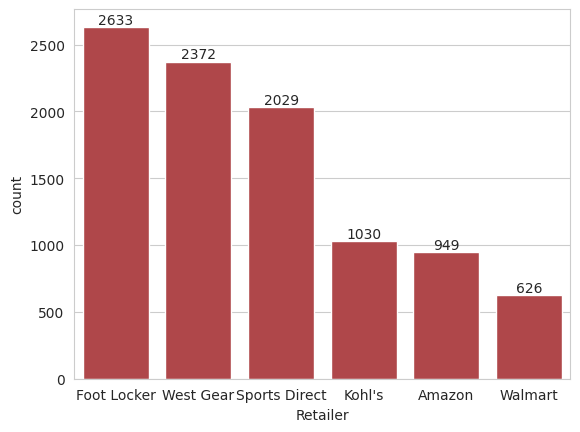

In [ ]:
graph = sns.countplot(x = "Retailer", data = data, order = data.Retailer.value_counts().index)
for container in graph.containers:
    graph.bar_label(container)
plt.savefig('retailer_countplot.jpeg', format='jpeg')
plt.show()

### Analsis Kolom `Invoice Date`


In [ ]:
data["Invoice Date"].unique()[:50]

array(['6/17/2021', '7/16/2021', '8/25/2021', '8/27/2021', '8/21/2021',
       '1/11/2021', '11/17/2021', '1/23/2021', '4/3/2021', '3/10/2020',
       '1/18/2021', '2/11/2021', '6/11/2021', '4/10/2021', '3/16/2021',
       '9/16/2021', '2/21/2021', '10/21/2021', '5/3/2020', '4/19/2020',
       '4/27/2020', '3/10/2021', '10/11/2021', '11/11/2021', '3/4/2020',
       '1/25/2020', '1/7/2020', '1/1/2020', '2/7/2021', '8/22/2021',
       '2/18/2021', '8/11/2021', '4/17/2021', '11/20/2021', '3/16/2020',
       '8/26/2020', '9/1/2020', '1/31/2020', '2/6/2020', '3/17/2020',
       '4/18/2020', '3/15/2020', '3/17/2021', '6/18/2021', '10/18/2021',
       '11/18/2021', '5/12/2021', '9/12/2021', '3/19/2021', '9/19/2021'],
      dtype=object)

In [ ]:
# convert data type ke date time

data['Invoice Date'] = pd.to_datetime(data['Invoice Date'])
data['Invoice Date']

0      2021-06-17
1      2021-07-16
2      2021-08-25
3      2021-08-27
4      2021-08-21
          ...    
9636   2021-11-18
9637   2021-10-22
9638   2021-10-22
9639   2021-04-10
9640   2021-10-05
Name: Invoice Date, Length: 9639, dtype: datetime64[ns]

In [ ]:
# Display range Invoice Date
oldest_date = data['Invoice Date'].min()
newest_date = data['Invoice Date'].max()

print("Oldest Invoice Date:", oldest_date)
print("Newest Invoice Date:", newest_date)

Oldest Invoice Date: 2020-01-01 00:00:00
Newest Invoice Date: 2021-12-31 00:00:00


In [ ]:
# extract month (bulan)

data['Month'] = data['Invoice Date'].dt.month
data['Month']

0        6
1        7
2        8
3        8
4        8
        ..
9636    11
9637    10
9638    10
9639     4
9640    10
Name: Month, Length: 9639, dtype: int32

In [ ]:
# extract year (tahun)

data['Year'] = data['Invoice Date'].dt.year
data['Year']

0       2021
1       2021
2       2021
3       2021
4       2021
        ... 
9636    2021
9637    2021
9638    2021
9639    2021
9640    2021
Name: Year, Length: 9639, dtype: int32

In [ ]:
# extract day (hari)

data['Day'] = data['Invoice Date'].dt.day
data['Day']

0       17
1       16
2       25
3       27
4       21
        ..
9636    18
9637    22
9638    22
9639    10
9640     5
Name: Day, Length: 9639, dtype: int32

In [ ]:
# Feature Engineering membuat kolom season

def find_seasons(monthNumber):
    if monthNumber in [12, 1, 2]:
        return 'Winter'

    elif monthNumber in [3, 4, 5]:
        return 'Spring'

    elif monthNumber in [6, 7, 8]:
        return 'Summer'

    elif monthNumber in [9, 10, 11]:
        return 'Autumn'

data['Season'] = data['Month'].apply(find_seasons)
data['Season']

0       Summer
1       Summer
2       Summer
3       Summer
4       Summer
         ...  
9636    Autumn
9637    Autumn
9638    Autumn
9639    Spring
9640    Autumn
Name: Season, Length: 9639, dtype: object

In [ ]:
# convert kolom month ke month_name

# data['Month'] = pd.to_datetime(data['Month'], format='%m').dt.month_name()

In [ ]:
# convert datatype beberapa kolom

data["Day"] = data['Day'].astype('category')
data["Month"] = data['Month'].astype('category')
data['Season'] = data['Season'].astype('category')
data['Year'] = data['Year'].astype('category')

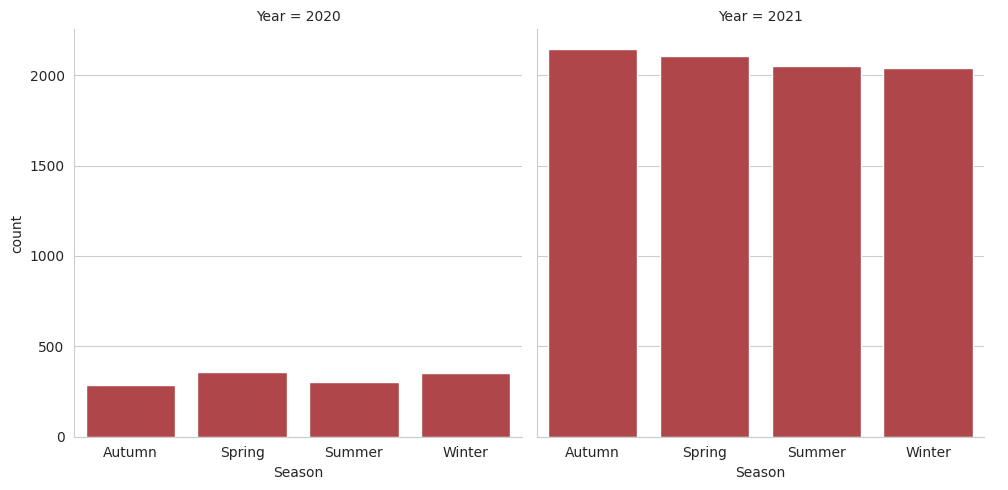

In [ ]:
graph = sns.catplot(x = "Season", col = "Year", data = data, kind = "count")
plt.savefig('invoice_date_countplot.jpeg', format='jpeg')
plt.show()

### Analisis Kolom `Region`

In [ ]:
data['Region'].unique()

array(['Southeast', 'South', 'Midwest', 'Northeast', 'West'], dtype=object)

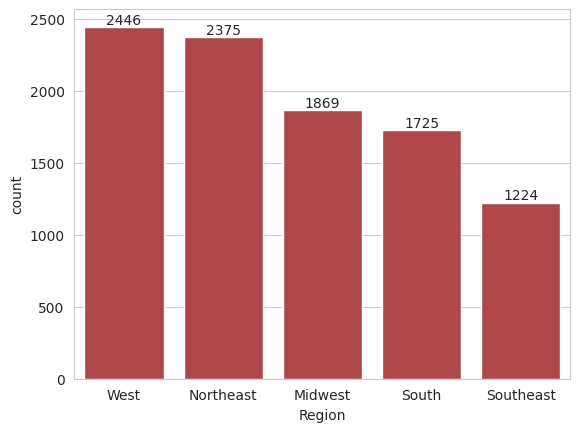

In [ ]:
graph = sns.countplot(x = "Region", data = data, order = data.Region.value_counts().index)
for container in graph.containers:
    graph.bar_label(container)
plt.savefig('region_countplot.jpeg', format='jpeg')
plt.show()

### Analisis Kolom `State`

In [ ]:
data['State'].unique()

array(['Florida', 'Louisiana', 'Alabama', 'Missouri', 'Mississippi',
       'Wisconsin', 'New York', 'Michigan', 'Utah', 'Ohio', 'Arkansas',
       'Georgia', 'Texas', 'Oklahoma', 'West Virginia', 'California',
       'South Carolina', 'Kansas', 'Tennessee', 'North Carolina', 'Idaho',
       'Indiana', 'New Jersey', 'Oregon', 'South Dakota', 'North Dakota',
       'Iowa', 'Maryland', 'Delaware', 'Washington', 'Virginia',
       'Wyoming', 'Minnesota', 'Kentucky', 'Connecticut', 'Rhode Island',
       'Massachusetts', 'New Mexico', 'Nevada', 'Illinois', 'Nebraska',
       'Maine', 'Arizona', 'Vermont', 'New Hampshire', 'Hawaii',
       'Montana', 'Colorado', 'Pennsylvania', 'Alaska'], dtype=object)

In [ ]:
data['State'].nunique()

50

<ipython-input-31-328cf8e846bf>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph = sns.countplot(x = "State", data = data, order = data.State.value_counts()[:20].index, palette = "RdBu")


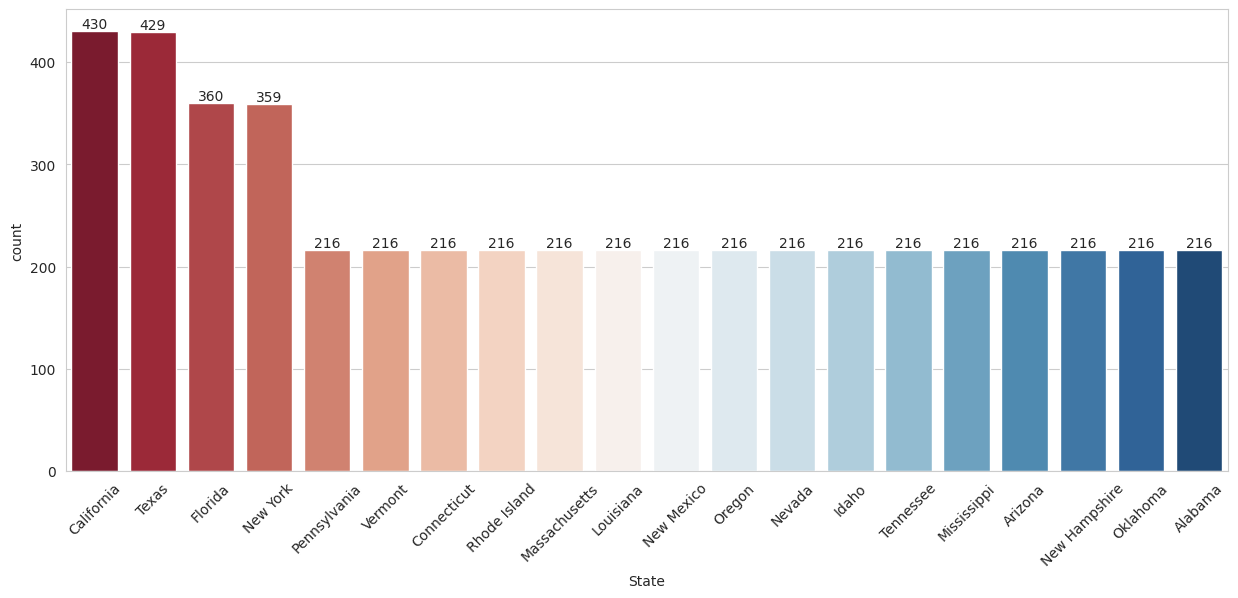

In [ ]:
plt.figure(figsize = (15,6))
graph = sns.countplot(x = "State", data = data, order = data.State.value_counts()[:20].index, palette = "RdBu")
for container in graph.containers:
    graph.bar_label(container)

plt.xticks(rotation = 45)
plt.savefig('state_countplot.jpeg', format='jpeg')
plt.show()

### Analisis Kolom `City`

In [ ]:
data['City'].unique()

array(['Orlando', 'New Orleans', 'Birmingham', 'St. Louis', 'Jackson',
       'Milwaukee', 'New York', 'Detroit', 'Salt Lake City', 'Columbus',
       'Little Rock', 'Atlanta', 'Houston', 'Oklahoma City', 'Charleston',
       'San Francisco', 'Dallas', 'Wichita', 'Miami', 'Knoxville',
       'Los Angeles', 'Charlotte', 'Boise', 'Indianapolis', 'Newark',
       'Portland', 'Sioux Falls', 'Fargo', 'Des Moines', 'Baltimore',
       'Wilmington', 'Seattle', 'Richmond', 'Albany', 'Cheyenne',
       'Minneapolis', 'Louisville', 'Hartford', 'Providence', 'Boston',
       'Albuquerque', 'Las Vegas', 'Chicago', 'Omaha', 'Phoenix',
       'Burlington', 'Manchester', 'Honolulu', 'Billings', 'Denver',
       'Philadelphia', 'Anchorage'], dtype=object)

In [ ]:
data['City'].nunique()

52

<ipython-input-34-9fae9cbfde52>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph = sns.countplot(x = "City", data = data, order = data.City.value_counts()[:20].index, palette = "RdBu")


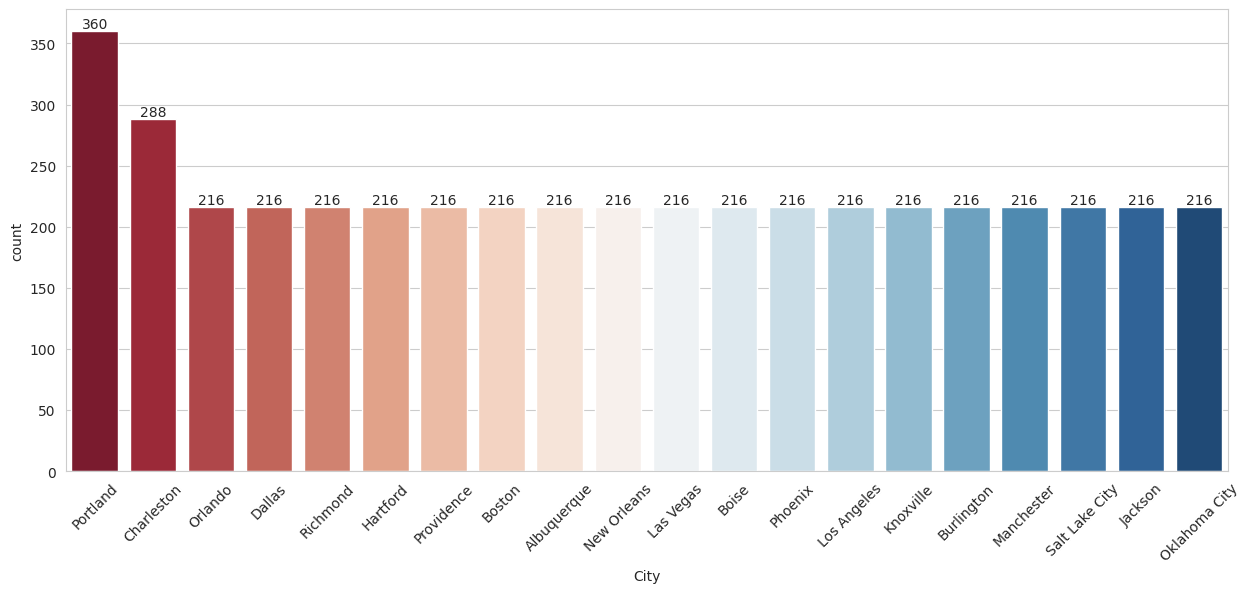

In [ ]:
plt.figure(figsize = (15,6))
graph = sns.countplot(x = "City", data = data, order = data.City.value_counts()[:20].index, palette = "RdBu")
for container in graph.containers:
    graph.bar_label(container)

plt.xticks(rotation = 45)
plt.savefig('city_countplot.jpeg', format='jpeg')
plt.show()

### Analisis Kolom ` Product`

In [ ]:
print(data['Product'].nunique())
print('-' * 20)
print(data['Product'].unique())

7
--------------------
["Women's Apparel" "Men's Street Footwear" "Women's Street Footwear"
 "Men's Athletic Footwear" "Women's Athletic Footwear" "Men's Apparel"
 "Men's aparel"]


In [ ]:
# mengubah <Men's aparel> menjadi <Men's Apparel>

data['Product'] = data['Product'].replace("Men's aparel", "Men's Apparel")

In [ ]:
print(data['Product'].nunique())
print('-' * 20)
print(data['Product'].unique())

6
--------------------
["Women's Apparel" "Men's Street Footwear" "Women's Street Footwear"
 "Men's Athletic Footwear" "Women's Athletic Footwear" "Men's Apparel"]


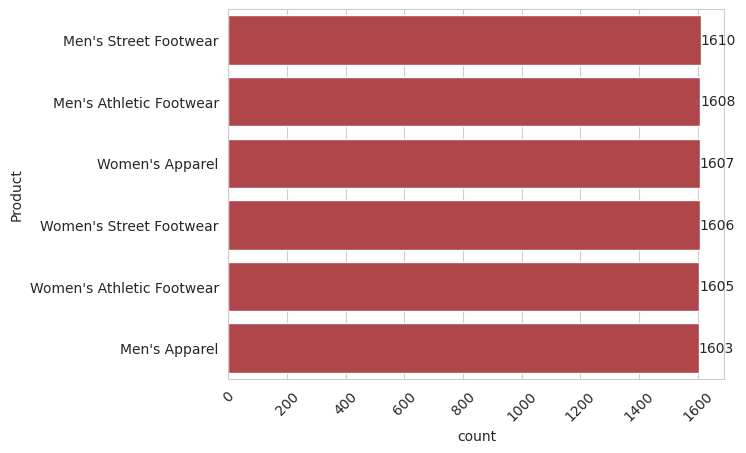

In [ ]:
graph = sns.countplot(y = "Product", data = data, order = data.Product.value_counts()[:20].index)
for container in graph.containers:
    graph.bar_label(container)

plt.xticks(rotation = 45)
plt.savefig('product_countplot.jpeg', format='jpeg')
plt.show()

### Analisis Kolom `Price per Unit`

In [ ]:
data['Price per Unit'].unique()

array(['$103.00 ', '$10.00 ', '$15.00 ', '$20.00 ', '$44.00 ', '$48.00 ',
       '$39.00 ', '$46.00 ', '$47.00 ', '$40.00 ', '$33.00 ', '$34.00 ',
       '$31.00 ', '$41.00 ', '$29.00 ', '$56.00 ', '$37.00 ', '$25.00 ',
       '$32.00 ', '$36.00 ', '$43.00 ', '$45.00 ', '$38.00 ', '$26.00 ',
       '$42.00 ', '$35.00 ', '$50.00 ', '$62.00 ', '$58.00 ', '$63.00 ',
       '$53.00 ', '$30.00 ', '$59.00 ', '$54.00 ', '$28.00 ', '$24.00 ',
       '$27.00 ', '$55.00 ', '$61.00 ', '$23.00 ', '$60.00 ', '$64.00 ',
       '$51.00 ', '$52.00 ', '$68.00 ', '$67.00 ', '$86.00 ', '$66.00 ',
       '$49.00 ', '$74.00 ', '$83.00 ', '$69.00 ', '$57.00 ', '$79.00 ',
       '$73.00 ', '$65.00 ', '$22.00 ', '$80.00 ', '$21.00 ', '$12.00 ',
       '$77.00 ', '$72.00 ', '$76.00 ', '$13.00 ', '$70.00 ', '$82.00 ',
       '$19.00 ', '$88.00 ', '$7.00 ', '$14.00 ', '$71.00 ', '$16.00 ',
       '$17.00 ', '$87.00 ', '$18.00 ', '$81.00 ', '$78.00 ', '$9.00 ',
       '$92.00 ', '$85.00 ', '$90.00 ', '$89.00 ', '

In [ ]:
# remone $

def removeDollarSign(price):
    return price.replace('$', '')

data['Price per Unit'] = data['Price per Unit'].apply(removeDollarSign)
data['Price per Unit']

0       103.00 
1       103.00 
2        10.00 
3        15.00 
4        15.00 
         ...   
9636     65.00 
9637     65.00 
9638     75.00 
9639     65.00 
9640     65.00 
Name: Price per Unit, Length: 9639, dtype: object

In [ ]:
# convert data type price per unit menjadi numeric

data['Price per Unit'] = pd.to_numeric(data['Price per Unit'], errors = 'coerce')

In [ ]:
# check missing value setelah assign error equal ke "coerce"

data['Price per Unit'].isna().sum()

0

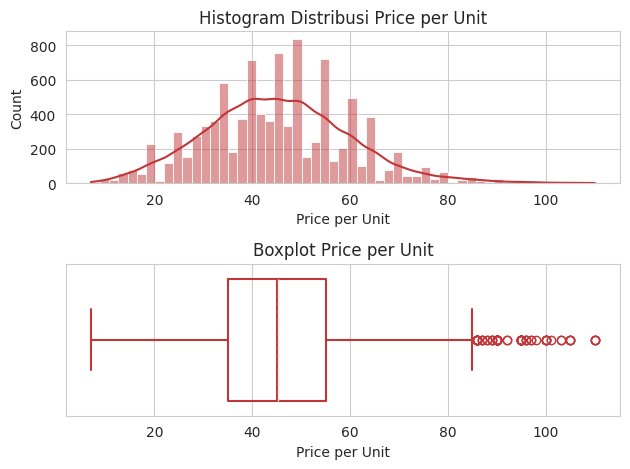

In [ ]:
# Membentuk plot Ptice per Units
plt.subplot(2,1,1)
sns.histplot(data['Price per Unit'], kde=True)
plt.title('Histogram Distribusi Price per Unit')

plt.subplot(2,1,2)
sns.boxplot(data=data, x='Price per Unit', showmeans=True, meanline = True, fill=False)
plt.title('Boxplot Price per Unit')

plt.tight_layout()
plt.savefig('price_per_units_countplot.jpeg', format='jpeg')
plt.show()

### Analisis Kolom ` Units Sold`

In [ ]:
data['Units Sold'].unique()[-50:]

array(['1,250', '1,220', '1,200', '1,150', '1,125', '1,075', '975', '925',
       '900', '875', '650', '600', '1,100', '1,070', '1,050', '1,045',
       '1,025', '1,020', '1,000', '950', '945', '920', '870', '850',
       '825', '820', '800', '795', '775', '770', '745', '725', '720',
       '695', '675', '670', '645', '625', '620', '595', '570', '550',
       '545', '525', '520', '500', '495', '470', '445', '395'],
      dtype=object)

In [ ]:
# mengganti koma dengan string kosong

def replace_comma(Unit):
    return Unit.replace(',', '')

data['Units Sold'] = data['Units Sold'].apply(replace_comma)

In [ ]:
# mengecek apakah koma sudah dihapus atau tidak

data['Units Sold'].unique()[-50:]

array(['1250', '1220', '1200', '1150', '1125', '1075', '975', '925',
       '900', '875', '650', '600', '1100', '1070', '1050', '1045', '1025',
       '1020', '1000', '950', '945', '920', '870', '850', '825', '820',
       '800', '795', '775', '770', '745', '725', '720', '695', '675',
       '670', '645', '625', '620', '595', '570', '550', '545', '525',
       '520', '500', '495', '470', '445', '395'], dtype=object)

In [ ]:
# mengubah data type units sold ke integer

data['Units Sold'] = data['Units Sold'].astype('int')

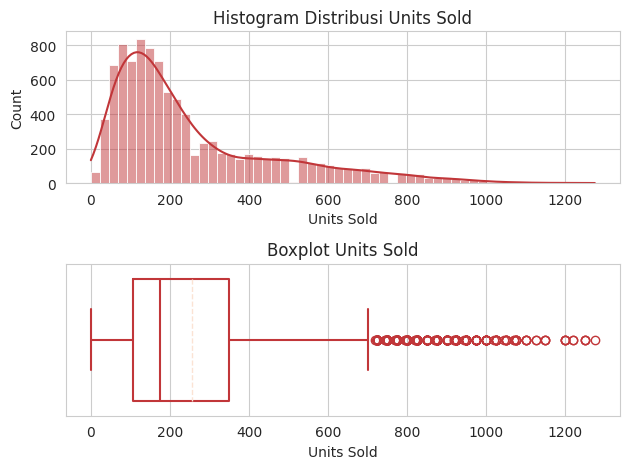

In [ ]:
# Membentuk plot Units Sold
plt.subplot(2,1,1)
sns.histplot(data['Units Sold'], kde=True)
plt.title('Histogram Distribusi Units Sold')

plt.subplot(2,1,2)
sns.boxplot(data=data, x='Units Sold', showmeans=True, meanline = True, fill=False)
plt.title('Boxplot Units Sold')

plt.tight_layout()
plt.savefig('Units Sold_countplot.jpeg', format='jpeg')
plt.show()

In [ ]:
# Menampilkan row yang nilainya 0 pada kolom Units Sold

data[data["Units Sold"] == 0]

Retailer Invoice Date   Region     State   City  \
6529  Foot Locker   2021-06-05  Midwest  Nebraska  Omaha   
6530  Foot Locker   2021-06-11  Midwest  Nebraska  Omaha   
6531  Foot Locker   2021-06-05  Midwest  Nebraska  Omaha   
6532  Foot Locker   2021-06-11  Midwest  Nebraska  Omaha   

                        Product  Price per Unit  Units Sold Total Sales  \
6529  Women's Athletic Footwear            35.0           0           0   
6530  Women's Athletic Footwear            30.0           0           0   
6531  Women's Athletic Footwear            33.0           0           0   
6532  Women's Athletic Footwear            27.0           0           0   

     Operating Profit Sales Method Month  Year Day  Season  
6529              $0        Outlet     6  2021   5  Summer  
6530              $0        Outlet     6  2021  11  Summer  
6531              $0        Online     6  2021   5  Summer  
6532              $0        Online     6  2021  11  Summer

In [ ]:
# drop rows units sold yang bernilai 0

data = data[data['Units Sold'] != 0]


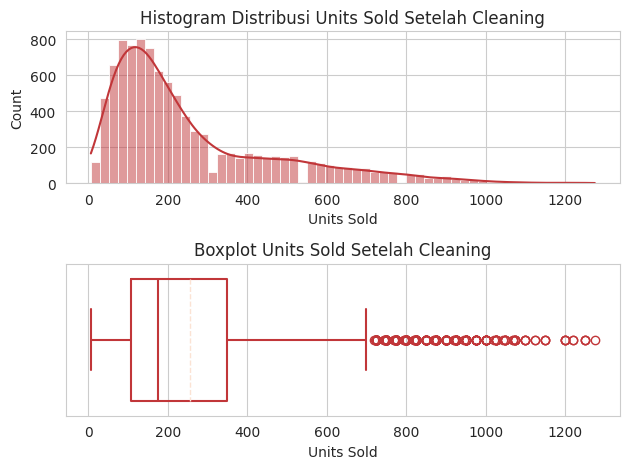

In [ ]:
# visualisasi kolom units sold setelah fix inconsistent values

# Membentuk plot Units Sold
plt.subplot(2,1,1)
sns.histplot(data['Units Sold'], kde=True)
plt.title('Histogram Distribusi Units Sold Setelah Cleaning')

plt.subplot(2,1,2)
sns.boxplot(data=data, x='Units Sold', showmeans=True, meanline = True, fill=False)
plt.title('Boxplot Units Sold Setelah Cleaning')

plt.tight_layout()
plt.savefig('Units Sold setelah cleaning_countplot.jpeg', format='jpeg')
plt.show()
# sns.histplot(x = "Units Sold", data = data, kde = True)
# plt.show()

### Analisis Kolom ` Total Sales`

In [ ]:
data['Total Sales'].unique()

array(['2,245', '1,679', '7,000', ..., '9,900', '11,700', '10,725'],
      dtype=object)

In [ ]:
# mengganti koma dengan string kosong

data['Total Sales'] = data['Total Sales'].apply(replace_comma) # replace_comma function i created it above

In [ ]:
# mengubah data type total sales menjadi numeric

data['Total Sales'] = pd.to_numeric(data['Total Sales'], errors = 'coerce', downcast = 'float')

In [ ]:
data.sample(3)

Retailer Invoice Date     Region         State        City  \
822   Foot Locker   2021-02-08  Northeast  Rhode Island  Providence   
7205       Kohl's   2021-07-12    Midwest        Kansas     Wichita   
2541    West Gear   2021-04-03    Midwest     Wisconsin   Milwaukee   

                      Product  Price per Unit  Units Sold  Total Sales  \
822           Women's Apparel            35.0         225       7875.0   
7205    Men's Street Footwear            55.0         675      37125.0   
2541  Women's Street Footwear            10.0         150       1500.0   

     Operating Profit Sales Method Month  Year Day  Season  
822           $3,150      In-store     2  2021   8  Winter  
7205         $12,994        Online     7  2021  12  Summer  
2541            $450      In-store     4  2021   3  Spring

In [ ]:
# Membuat kolom baru 'Correct total' untuk total penjualan yang benar

# 1- Menugaskan nilai kolom dengan nilai kolom total penjualan
data['Correct total'] = data['Total Sales']

# 2- Membandingkan nilai dengan nilai yang benar
data['Correct total'] = data['Correct total'] == (data['Price per Unit'] * data['Units Sold'])

### Analisis Kolom `Operating Profit `

In [ ]:
data['Operating Profit'].unique()

array(['$1,257 ', '$806 ', '$3,150 ', ..., '$4,290 ', '$7,394 ',
       '$2,925 '], dtype=object)

In [ ]:
# remove $

data['Operating Profit'] = data['Operating Profit'].apply(removeDollarSign) # removeDollarSign function i created it above
data['Operating Profit']

0       1,257 
1         806 
2       3,150 
3       3,881 
4       3,206 
         ...  
9636    2,438 
9637    2,438 
9638    2,813 
9639    2,925 
9640    2,925 
Name: Operating Profit, Length: 9635, dtype: object

In [ ]:
# mengganti koma dengan string kosong

data['Operating Profit'] = data['Operating Profit'].apply(replace_comma) # replace_comma function i created it above
data['Operating Profit']

0       1257 
1        806 
2       3150 
3       3881 
4       3206 
        ...  
9636    2438 
9637    2438 
9638    2813 
9639    2925 
9640    2925 
Name: Operating Profit, Length: 9635, dtype: object

In [ ]:
# convert data type to numeric

data['Operating Profit'] = pd.to_numeric(data['Operating Profit'], errors = 'coerce', downcast = 'float')

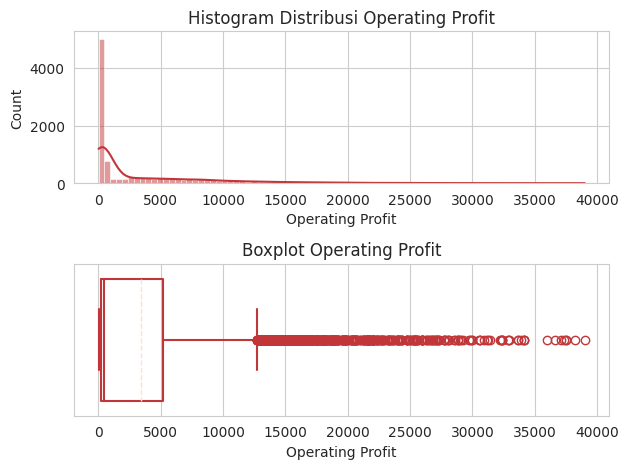

In [ ]:
# Membentuk plot Operating Profit
plt.subplot(2,1,1)
sns.histplot(data['Operating Profit'], kde=True)
plt.title('Histogram Distribusi Operating Profit')

plt.subplot(2,1,2)
sns.boxplot(data=data, x='Operating Profit', showmeans=True, meanline = True, fill=False)
plt.title('Boxplot Operating Profit')

plt.tight_layout()
plt.savefig('Operating Profit_countplot.jpeg', format='jpeg')
plt.show()

### Membuat Kolom `profit percentage`

In [ ]:
# create column

data['profit_percentage'] = (data['Operating Profit'] / data['Total Sales']) * 100

In [ ]:
# round values dari kolom profit_percentage

data["profit_percentage"] = data['profit_percentage'].astype('float').round()

### Mengkoreksi nilai dari kolom `Total Sales`

In [ ]:
# Correct values

data['Total Sales'] = data['Price per Unit'] * data['Units Sold']

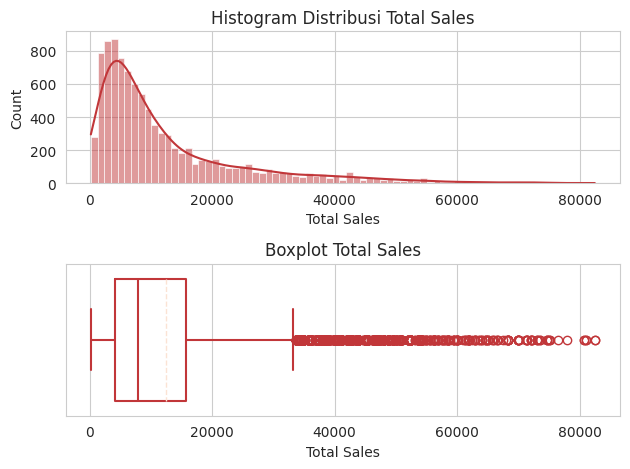

In [ ]:
# Membentuk plot Operating Profit
plt.subplot(2,1,1)
sns.histplot(data['Total Sales'], kde=True)
plt.title('Histogram Distribusi Total Sales')

plt.subplot(2,1,2)
sns.boxplot(data=data, x='Total Sales', showmeans=True, meanline = True, fill=False)
plt.title('Boxplot Total Sales')

plt.tight_layout()
plt.savefig('Total Sales_countplot.jpeg', format='jpeg')
plt.show()

In [ ]:
# Mengkalkulasi nilai profit dari kolom profit percentage

data['Operating Profit'] = data['Total Sales'] * (data['profit_percentage'] / 100)

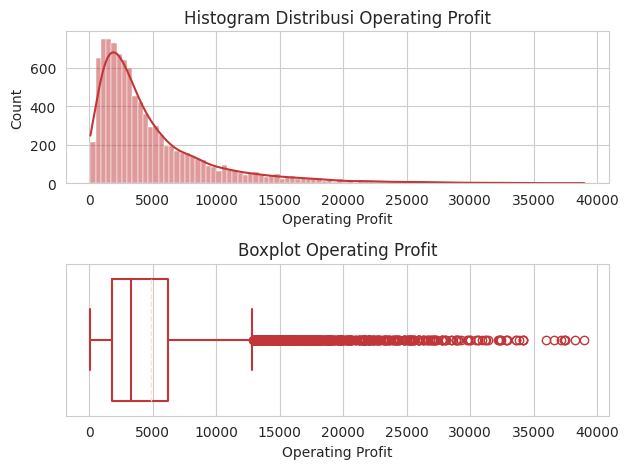

In [ ]:
# Membentuk plot Operating Profit
plt.subplot(2,1,1)
sns.histplot(data['Operating Profit'], kde=True)
plt.title('Histogram Distribusi Operating Profit')

plt.subplot(2,1,2)
sns.boxplot(data=data, x='Operating Profit', showmeans=True, meanline = True, fill=False)
plt.title('Boxplot Operating Profit')

plt.tight_layout()
plt.savefig('Operating Profit_countplot.jpeg', format='jpeg')
plt.show()

### Analisis Kolom `Sales Method`

In [ ]:
data['Sales Method'].unique()

array(['Online', 'Outlet', 'In-store'], dtype=object)

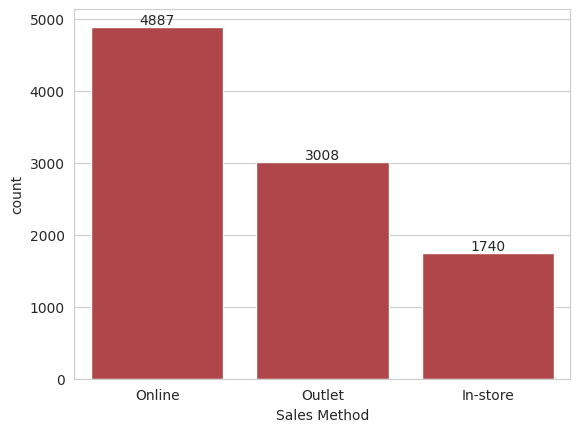

In [ ]:
graph = sns.countplot(x = "Sales Method", data = data, order = data['Sales Method'].value_counts().index)
for container in graph.containers:
    graph.bar_label(container)
plt.savefig('Sales Method_countplot.jpeg', format='jpeg')
plt.show()

In [ ]:
data.describe()

Invoice Date  Price per Unit   Units Sold  \
count                           9635     9635.000000  9635.000000   
mean   2021-05-10 18:44:47.950181632       45.217955   256.799273   
min              2020-01-01 00:00:00        7.000000     6.000000   
25%              2021-02-17 00:00:00       35.000000   106.000000   
50%              2021-06-04 00:00:00       45.000000   176.000000   
75%              2021-09-16 00:00:00       55.000000   350.000000   
max              2021-12-31 00:00:00      110.000000  1275.000000   
std                              NaN       14.705179   214.020187   

        Total Sales  Operating Profit  profit_percentage  
count   9635.000000       9635.000000        9635.000000  
mean   12446.837052       4893.396198          42.304203  
min      160.000000         80.000000          10.000000  
25%     4068.000000       1753.920000          35.000000  
50%     7802.000000       3261.960000          41.000000  
75%    15780.000000       6188.790000          49.000000  
max    82500.000000      39000.000000          80.000000  
std    12703.110069       4864.183734           9.718123

### Ringkasan

- Menghapus baris yang memiliki nilai yang hilang di kolom `Price per units`, karena nilai ini sangat kecil.
- Pada kolom `Invoice Date`, kami mengekstrak beberapa nilai seperti `tahun`, `bulan`, `hari` dan membuat kolom `season` berdasarkan kolom bulan dan kemudian menghapusnya.
- Pada kolom `Product`, terdapat nilai duplikat akibat kesalahan penulisan dan kami memperbaikinya.
- Pada kolom `Price per Unit`, kami menghapus tanda Dollar dan mengubah tipe data menjadi numerik.
- Pada kolom `Units Sold`, kami mengganti koma dengan string kosong dan mengubah tipe data menjadi integer.
    - ⚠️ Saat menemukan kolom ini, kami menemukan nilai-nol "Units Sold", yang menandakan kemungkinan adanya pengembalian penjualan oleh pelanggan dan uang yang dikembalikan kepadanya.
    - 💡 `kami memutuskan untuk menghapusnya`.
    
- Pada kolom `Total Sales`, kami mengganti koma dengan string kosong dan mengubah tipe data menjadi numerik.
    - ⚠️ Saat menemukan kolom ini, beberapa nilai dalam "Total Sales" tidak benar. Ini juga memengaruhi beberapa nilai dalam kolom "Operating Profit" di baris yang sama.
    - 💡 kami memperbaiki ini dengan melakukan beberapa `perhitungan dan menambahkan beberapa kolom untuk membantu memperbaiki masalah ini`.
- Pada kolom `Total Sales`, kami menghapus tanda Dollar, mengganti koma dengan string kosong, dan mengubah tipe data menjadi numerik.


In [ ]:
# Feature Engineering Drop kolom yang tidak dibutuhkan

data.drop(columns = ['Correct total', 'profit_percentage'], inplace = True)
data.sample(3)

Retailer Invoice Date   Region      State         City  \
7177  Sports Direct   2021-11-05     West      Idaho        Boise   
168     Foot Locker   2021-05-19  Midwest   Missouri    St. Louis   
158       West Gear   2021-07-16    South  Louisiana  New Orleans   

                      Product  Price per Unit  Units Sold  Total Sales  \
7177  Men's Athletic Footwear            35.0         675      23625.0   
168   Women's Street Footwear            30.0         300       9000.0   
158     Men's Street Footwear            62.0         306      18972.0   

      Operating Profit Sales Method Month  Year Day  Season  
7177           9450.00       Online    11  2021   5  Autumn  
168            3150.00     In-store     5  2021  19  Spring  
158            8157.96       Outlet     7  2021  16  Summer

In [ ]:
data.describe()

Invoice Date  Price per Unit   Units Sold  \
count                           9635     9635.000000  9635.000000   
mean   2021-05-10 18:44:47.950181632       45.217955   256.799273   
min              2020-01-01 00:00:00        7.000000     6.000000   
25%              2021-02-17 00:00:00       35.000000   106.000000   
50%              2021-06-04 00:00:00       45.000000   176.000000   
75%              2021-09-16 00:00:00       55.000000   350.000000   
max              2021-12-31 00:00:00      110.000000  1275.000000   
std                              NaN       14.705179   214.020187   

        Total Sales  Operating Profit  
count   9635.000000       9635.000000  
mean   12446.837052       4893.396198  
min      160.000000         80.000000  
25%     4068.000000       1753.920000  
50%     7802.000000       3261.960000  
75%    15780.000000       6188.790000  
max    82500.000000      39000.000000  
std    12703.110069       4864.183734

## **Exploratory Data Analysis**

In [ ]:
# Buat fungsi groupData untuk mengelompokkan setiap kolom dengan Total Sales dan Operating Profit

def groupData(namaKolom):
    return data.groupby(namaKolom).agg({'Total Sales' : sum, 'Operating Profit' : 'sum'})

### Bivariate Analysis

#### Retailer dengan Total Sales dan Operating Profit

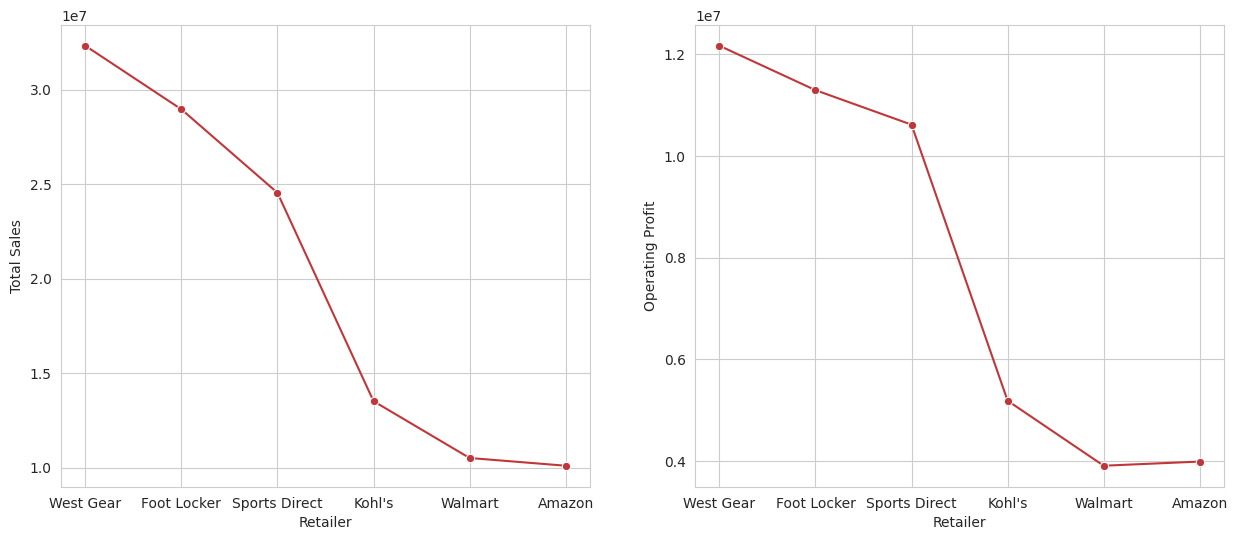

In [ ]:
# Bagaimana total penjualan, Keuntungan Operasional di setiap Ritel?

RetailerSales = groupData('Retailer').sort_values(by = 'Total Sales', ascending = False)

# atur ukuran untuk plot
plt.figure(figsize = (15,6))

# membuat plot Total Penjualan
plt.subplot(1, 2, 1)
sns.lineplot(x = RetailerSales.index, y = "Total Sales", data = RetailerSales, marker = "o")


# Membuat plot Keuntungan Operasional
plt.subplot(1, 2, 2)
sns.lineplot(x = RetailerSales.index, y = "Operating Profit", data = RetailerSales, marker='o')

plt.savefig('EDA_Retailer.jpeg', format='jpeg')
plt.show()

-  `West Gear` and `Foot locker` emerge as the top retailers, capturing 27% and 24% of sales, respectively.

In [ ]:
# Memperlihatkan Total Sales dan Operating Profit

RetailerSales['sales percentage'] = (RetailerSales['Total Sales'] / RetailerSales['Total Sales'].sum()) * 100
RetailerSales

Total Sales  Operating Profit  sales percentage
Retailer                                                      
West Gear       32317808.0       12168804.30         26.948288
Foot Locker     28953945.0       11294510.32         24.143322
Sports Direct   24537997.0       10615105.88         20.461072
Kohl's          13512453.0        5182266.02         11.267394
Walmart         10506085.0        3902748.70          8.760526
Amazon          10096987.0        3984437.15          8.419399

#### Region dengan Total Sales dan Operating Profit

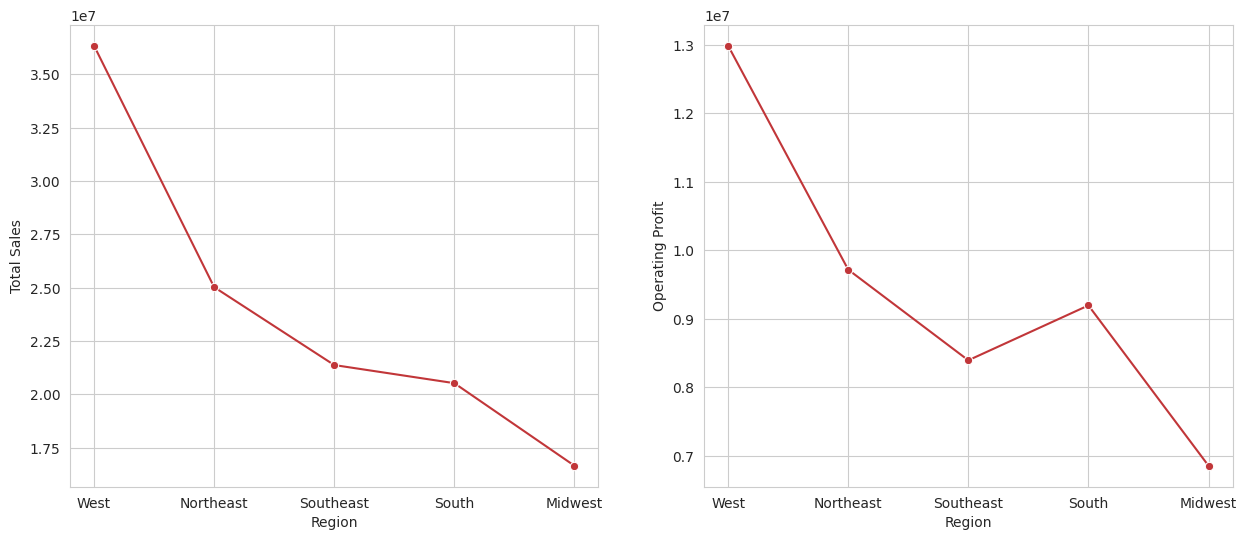

In [ ]:
# Bagaimana total sales, Operating Profit di setiap Region ?


RegionSales = groupData('Region').sort_values(by = 'Total Sales', ascending = False)

# set size plot
plt.figure(figsize = (15,6))

# membuat plot total sales
plt.subplot(1, 2, 1)
sns.lineplot(x = RegionSales.index, y = "Total Sales", data = RegionSales, marker = "o")


# membuat plot operating profit
plt.subplot(1, 2, 2)
sns.lineplot(x = RegionSales.index, y = "Operating Profit", data = RegionSales, marker='o')

plt.savefig('EDA_Region.jpeg', format='jpeg')
plt.show()

- `West` and `Northeast` emerge as the top Region, capture 30% and 21% of sales  respectively.

In [ ]:
# Show Total Sales and Operating Profit

RegionSales['sales percentage'] = ((RegionSales['Total Sales'] / RegionSales['Total Sales'].sum()) * 100).round()
RegionSales

Total Sales  Operating Profit  sales percentage
Region                                                    
West        36344407.0       12989521.55              30.0
Northeast   25027267.0        9717495.29              21.0
Southeast   21374436.0        8393057.36              18.0
South       20524731.0        9195085.80              17.0
Midwest     16654434.0        6852712.37              14.0

#### Product dengan Total Sales dan Operating Profit

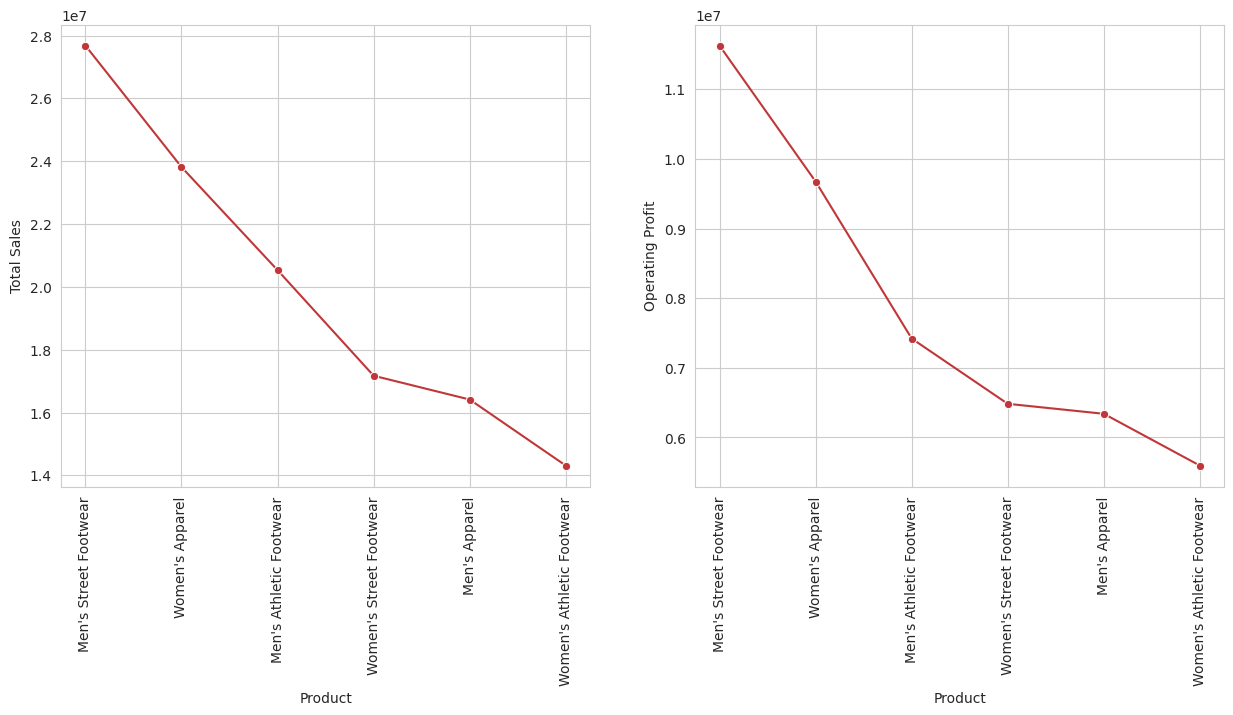

In [ ]:
# Bagaimana total sales, Operating Profit di setiap Product ?


ProductSales = groupData('Product').sort_values(by = 'Total Sales', ascending = False)

# set size plot
plt.figure(figsize = (15,6))

# membuat plot Total Sales
plt.subplot(1, 2, 1)
sns.lineplot(x = ProductSales.index, y = "Total Sales", data = ProductSales, marker = "o")
plt.xticks(rotation = 90)


# membuat plot Operating Profit
plt.subplot(1, 2, 2)
sns.lineplot(x = ProductSales.index, y = "Operating Profit", data = ProductSales, marker='o')
plt.xticks(rotation = 90)

plt.savefig('EDA_Product.jpeg', format='jpeg')
plt.show()

- Top product categories such as `Men’s Street Footwear`, `Women’s Apparel`, and `Men’s Athletic Footwear`, which collectively account for 60% of total sales

In [ ]:
# Show Total Sales and Operating Profit

ProductSales['sales percentage'] = ((ProductSales['Total Sales'] / ProductSales['Total Sales'].sum()) * 100).round()
ProductSales

Total Sales  Operating Profit  sales percentage
Product                                                                   
Men's Street Footwear       27680769.0       11629045.62              23.0
Women's Apparel             23814985.0        9676820.56              20.0
Men's Athletic Footwear     20532180.0        7421729.32              17.0
Women's Street Footwear     17171938.0        6483647.11              14.0
Men's Apparel               16413882.0        6340422.37              14.0
Women's Athletic Footwear   14311521.0        5596207.39              12.0

#### Seasons dengan Total Sales dan Operating Profit

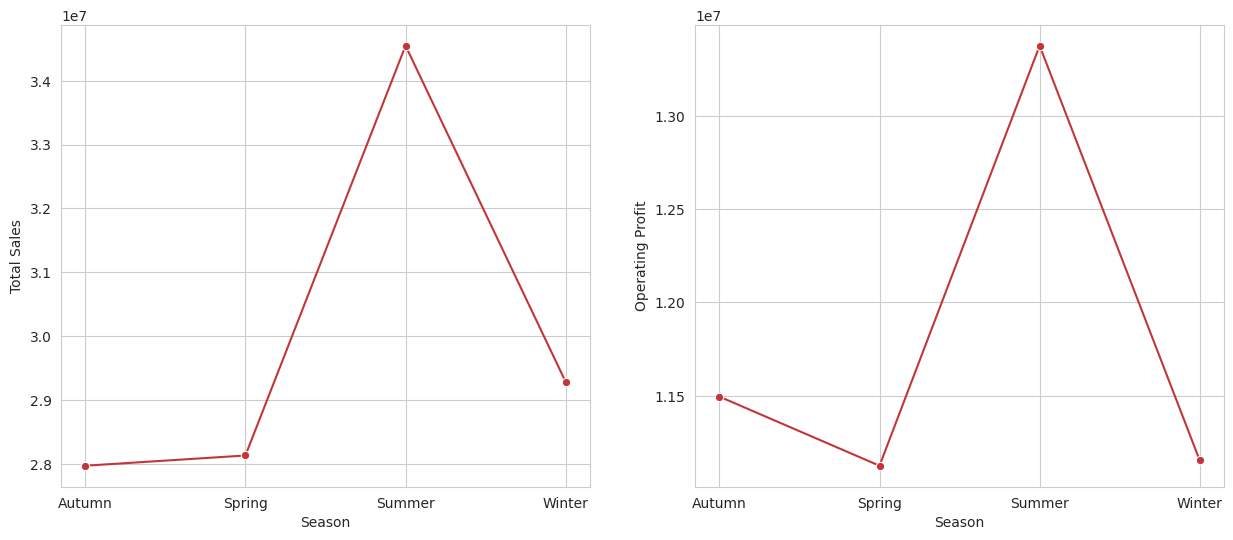

In [ ]:
# Bagaimana total sales, Operating Profit di setiap Season ?

SeasonSales = groupData('Season').sort_values(by = 'Total Sales', ascending = False)

# set size plot
plt.figure(figsize = (15,6))

# membuat plot Total Sales
plt.subplot(1, 2, 1)
sns.lineplot(x = SeasonSales.index, y = "Total Sales", data = SeasonSales, marker = "o")


# membuat plot Operating Profit
plt.subplot(1, 2, 2)
sns.lineplot(x = SeasonSales.index, y = "Operating Profit", data = SeasonSales, marker='o')

plt.savefig('EDA_Seasons.jpeg', format='jpeg')
plt.show()

- Sales increase in the `summer` and `winter` seasons, which represent 29 % and 24%  of sales respectively.It may be due to school season or recreational breaks on the beach

In [ ]:
# Show Total Sales and Operating Profit

SeasonSales['sales percentage'] = ((SeasonSales['Total Sales'] / SeasonSales['Total Sales'].sum()) * 100).round()
SeasonSales

Total Sales  Operating Profit  sales percentage
Season                                                 
Summer   34548167.0       13378861.05              29.0
Winter   29281202.0       11151361.78              24.0
Spring   28128124.0       11123263.49              23.0
Autumn   27967782.0       11494386.05              23.0

#### Sales Method dengan Total Sales dan Operating Profit

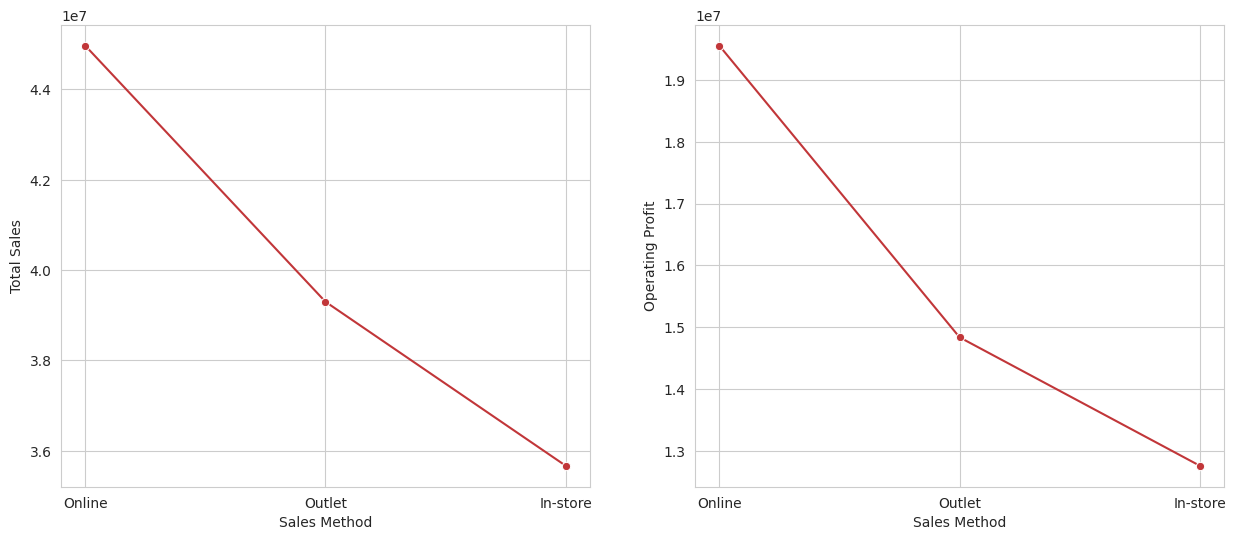

In [ ]:
# Bagaimana total sales, Operating Profit di setiap Sales Method ?

SalesMethod = groupData('Sales Method').sort_values(by = 'Total Sales', ascending = False)

# set size plot
plt.figure(figsize = (15,6))

# membuat plot Total Sales
plt.subplot(1, 2, 1)
sns.lineplot(x = SalesMethod.index, y = "Total Sales", data = SalesMethod, marker = "o")


# membuat plot Operating Profit
plt.subplot(1, 2, 2)
sns.lineplot(x = SalesMethod.index, y = "Operating Profit", data = SalesMethod, marker='o')

plt.savefig('EDA_Sales Method.jpeg', format='jpeg')
plt.show()

-  The `online sales method` ranked first with a percentage 37%, followed by `Outlet Sales method` with a percentage 33%

In [ ]:
# Show Total Sales and Operating Profit

SalesMethod['sales percentage'] = ((SalesMethod['Total Sales'] / SalesMethod['Total Sales'].sum()) * 100).round()
SalesMethod

Total Sales  Operating Profit  sales percentage
Sales Method                                                 
Online         44965657.0       19552559.15              37.0
Outlet         39295243.0       14836184.47              33.0
In-store       35664375.0       12759128.75              30.0

#### Year dengan Total Sales dan Operating Profit

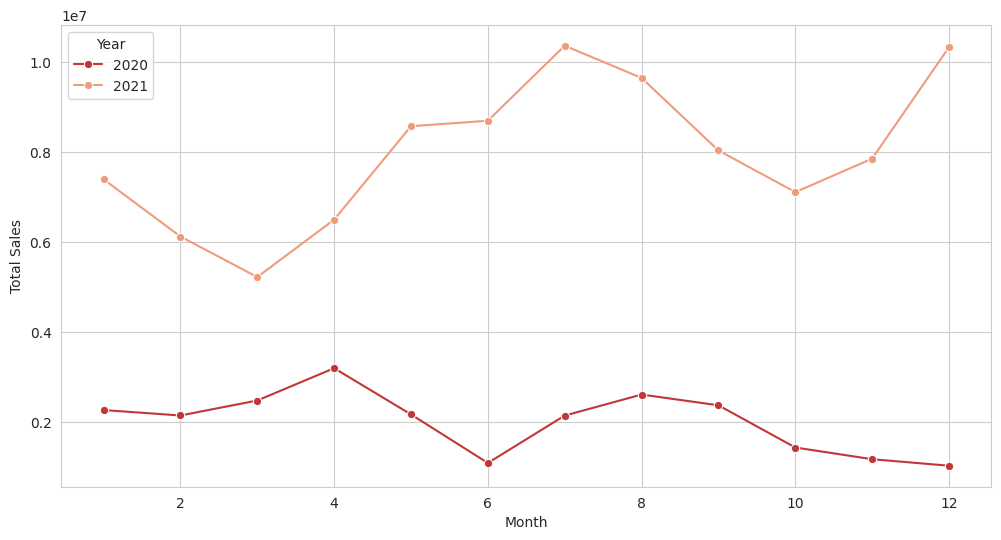

In [ ]:
# bagaimana total sales setiap tahun ?

sales_by_month = data.groupby(['Year','Month'])['Total Sales'].sum().reset_index()

# membuat plot
plt.figure(figsize = (12,6))
sns.lineplot(x = "Month", y = "Total Sales", hue = "Year", data = sales_by_month, marker='o')

plt.savefig('EDA_Year.jpeg', format='jpeg')
plt.show()

- In `2021`, sales were much higher than in `2020`, and the main reason for this was Covid-19.

#### Seasons dengan Units Sold

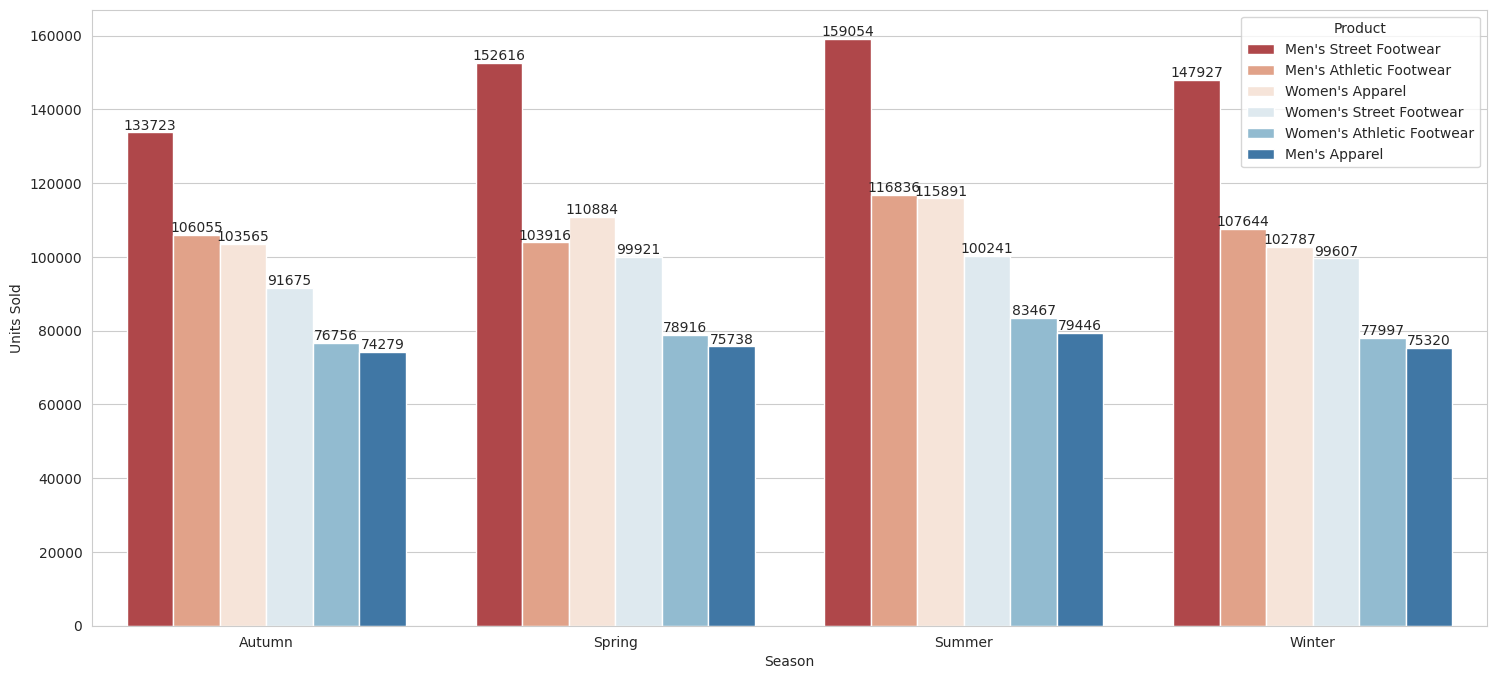

In [ ]:
# apakah sale dari product tertentu meningkat atau berkurang selama seasons tertentu?
seasonSales = data.groupby(['Season', 'Product'])['Units Sold'].sum().reset_index().sort_values(
                                                                                        by = 'Units Sold', ascending = False)
# membuat plot
plt.figure(figsize = (18,8))
graph = sns.barplot(x = "Season", y = "Units Sold", hue = 'Product', data = seasonSales)
for container in graph.containers:
    graph.bar_label(container)

plt.savefig('EDA_Seasons Units Sold.jpeg', format='jpeg')
plt.show()

#### Seasons dengan Sales Method

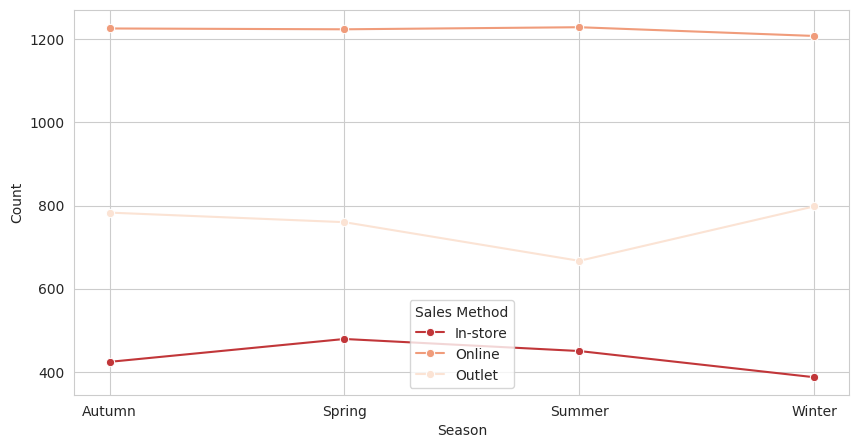

In [ ]:
# apakah sales method meningkat atau menurun selama setiap seasons?
seasonSalesMethod = data.groupby(['Season', 'Sales Method']).agg(Count = ('Sales Method', 'count'))

# membuat plot
plt.figure(figsize = (10,5))
sns.lineplot(x = "Season", y = "Count", hue = 'Sales Method', data = seasonSalesMethod, marker='o')

plt.savefig('EDA_Seasons Sales Method.jpeg', format='jpeg')
plt.show()

#### State dengan Total Sales dan Operating Profit

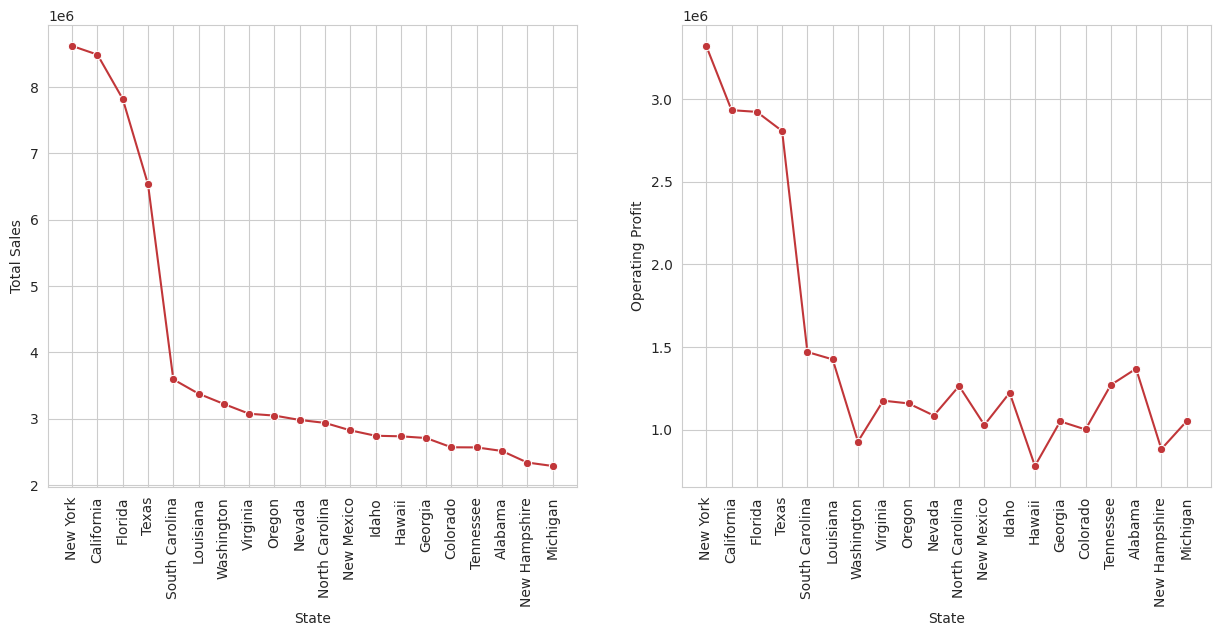

In [ ]:
# bagaimana distribusi sales top 20 berdasarkan statenya?
stateSales = groupData('State').sort_values(by = 'Total Sales', ascending = False)[:20]

# set size plot
plt.figure(figsize = (15,6))

# membuat plot Total Sales
plt.subplot(1, 2, 1)
sns.lineplot(x = stateSales.index, y = "Total Sales", data = stateSales, marker = "o")
plt.xticks(rotation = 90)


# membuat plot Operating Profit
plt.subplot(1, 2, 2)
sns.lineplot(x = stateSales.index, y = "Operating Profit", data = stateSales, marker='o')
plt.xticks(rotation = 90)

plt.savefig('EDA_State.jpeg', format='jpeg')
plt.show()

#### Product dengan Price per Unit

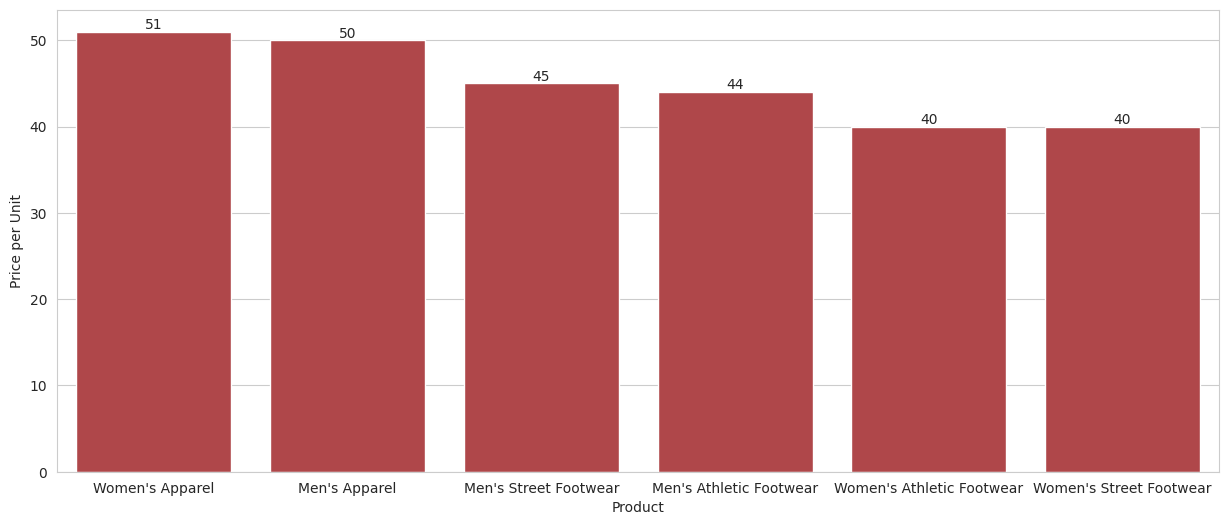

In [ ]:
# berapa rata-rata harga product per unitnya?

productsPerUnit = data.groupby('Product')['Price per Unit'].median().reset_index().sort_values(
                                                                                    by = 'Price per Unit', ascending = False)

plt.figure(figsize = (15,6))
graph = sns.barplot(x = 'Product', y = 'Price per Unit', data = productsPerUnit)

for container in graph.containers:
    graph.bar_label(container)

plt.savefig('EDA_Product Price per Units.jpeg', format='jpeg')
plt.show()

### **Multivariate Analysis**

#### Hubungan Setiap Pasangan Variabel Numerik Pada Dataset

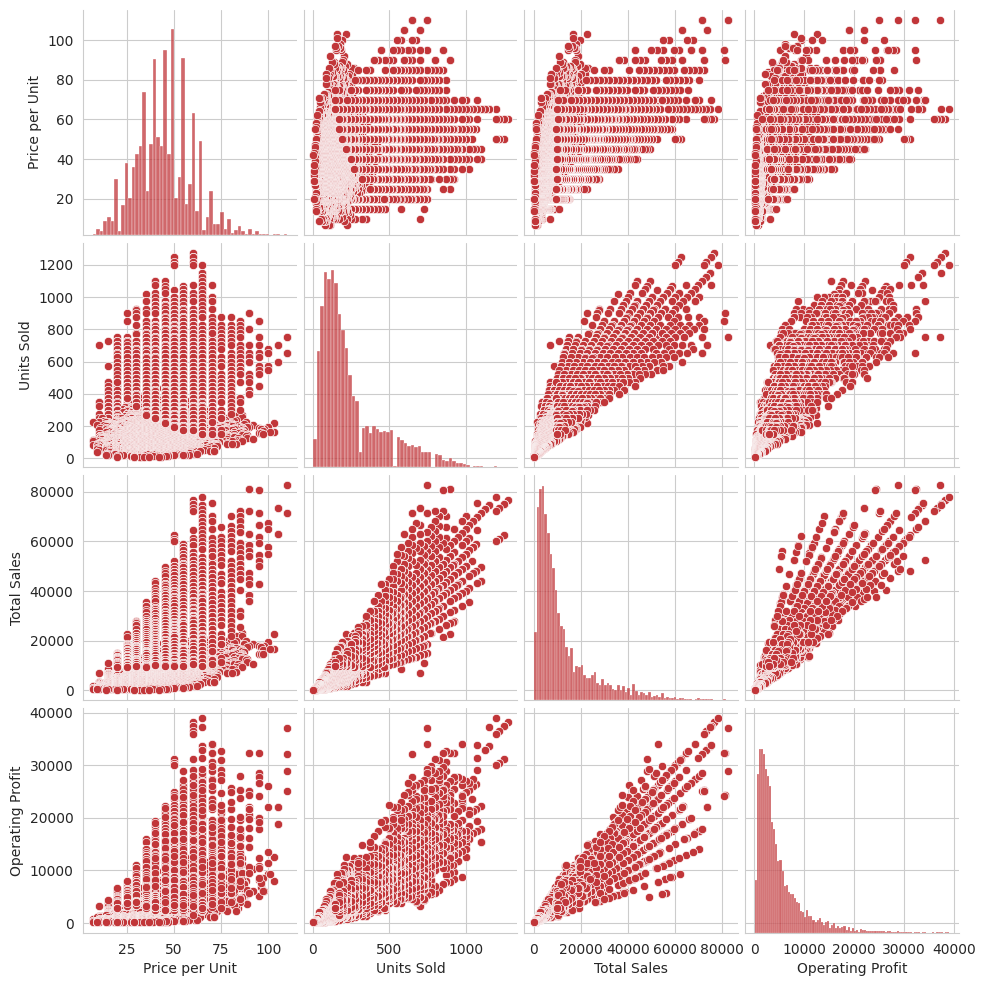

In [ ]:
# Membentuk plot
sns.pairplot(data)
plt.savefig('MULTI_parplot variabel numerik.jpeg', format='jpeg')
plt.show()

#### Hubungan Setiap Pasangan Variabel Numerik Pada Dataset Berdasarkan Retailer

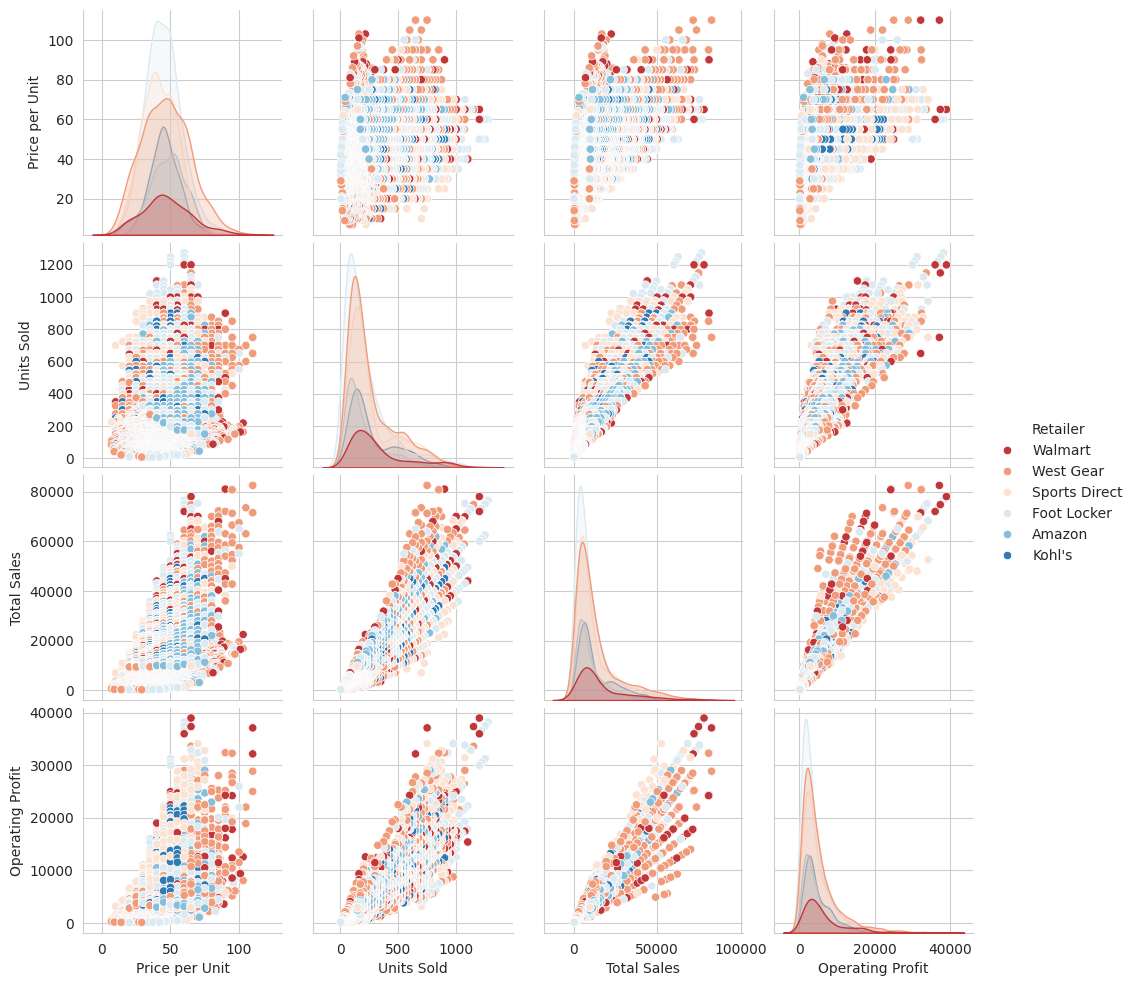

In [ ]:
# Membentuk plot
sns.pairplot(data, hue="Retailer")
plt.savefig('MULTI_parplot hue Retailer.jpeg', format='jpeg')
plt.show()

#### Hubungan Setiap Pasangan Variabel Numerik Pada Dataset Berdasarkan Region

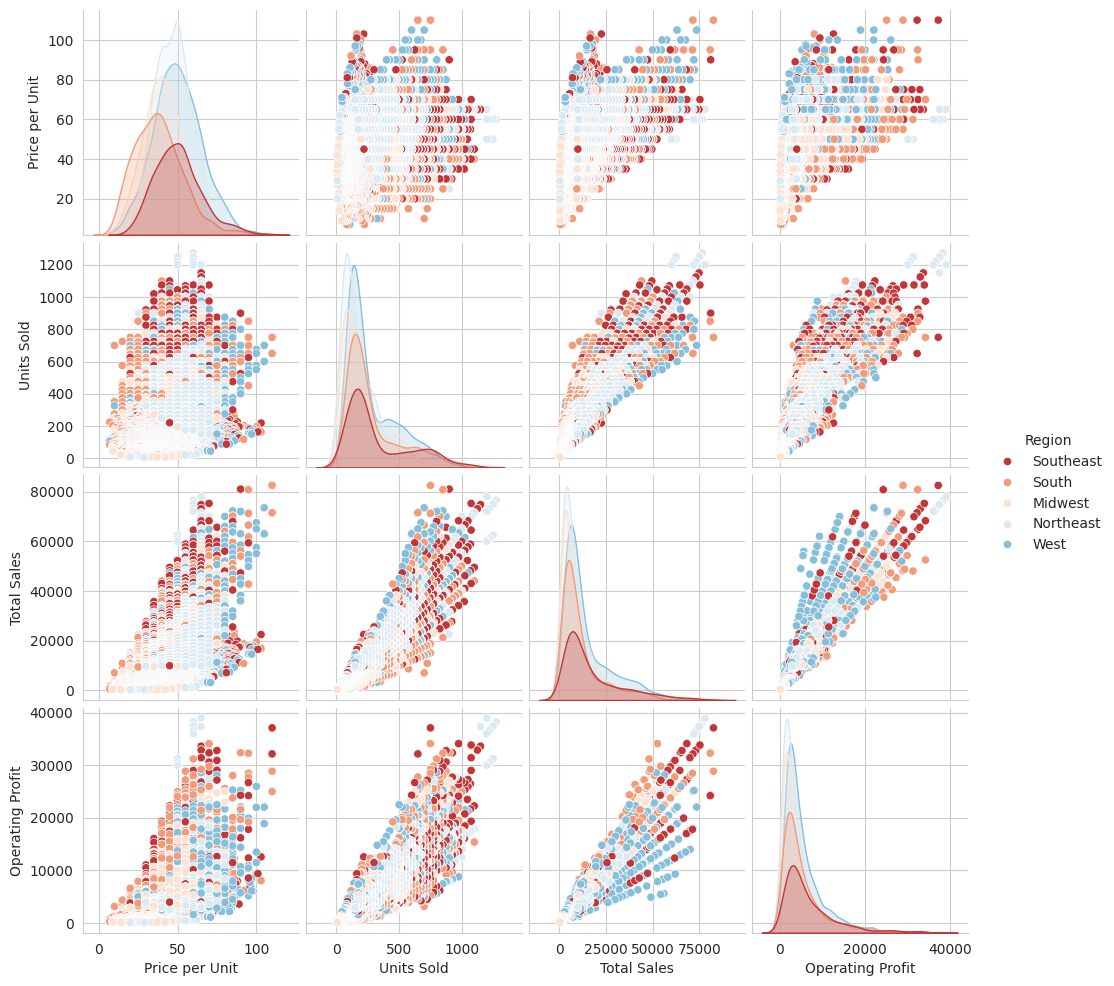

In [ ]:
# Membentuk plot
sns.pairplot(data, hue="Region")
plt.savefig('MULTI_parplot hue Region.jpeg', format='jpeg')
plt.show()

#### Hubungan Setiap Pasangan Variabel Numerik Pada Dataset Berdasarkan State

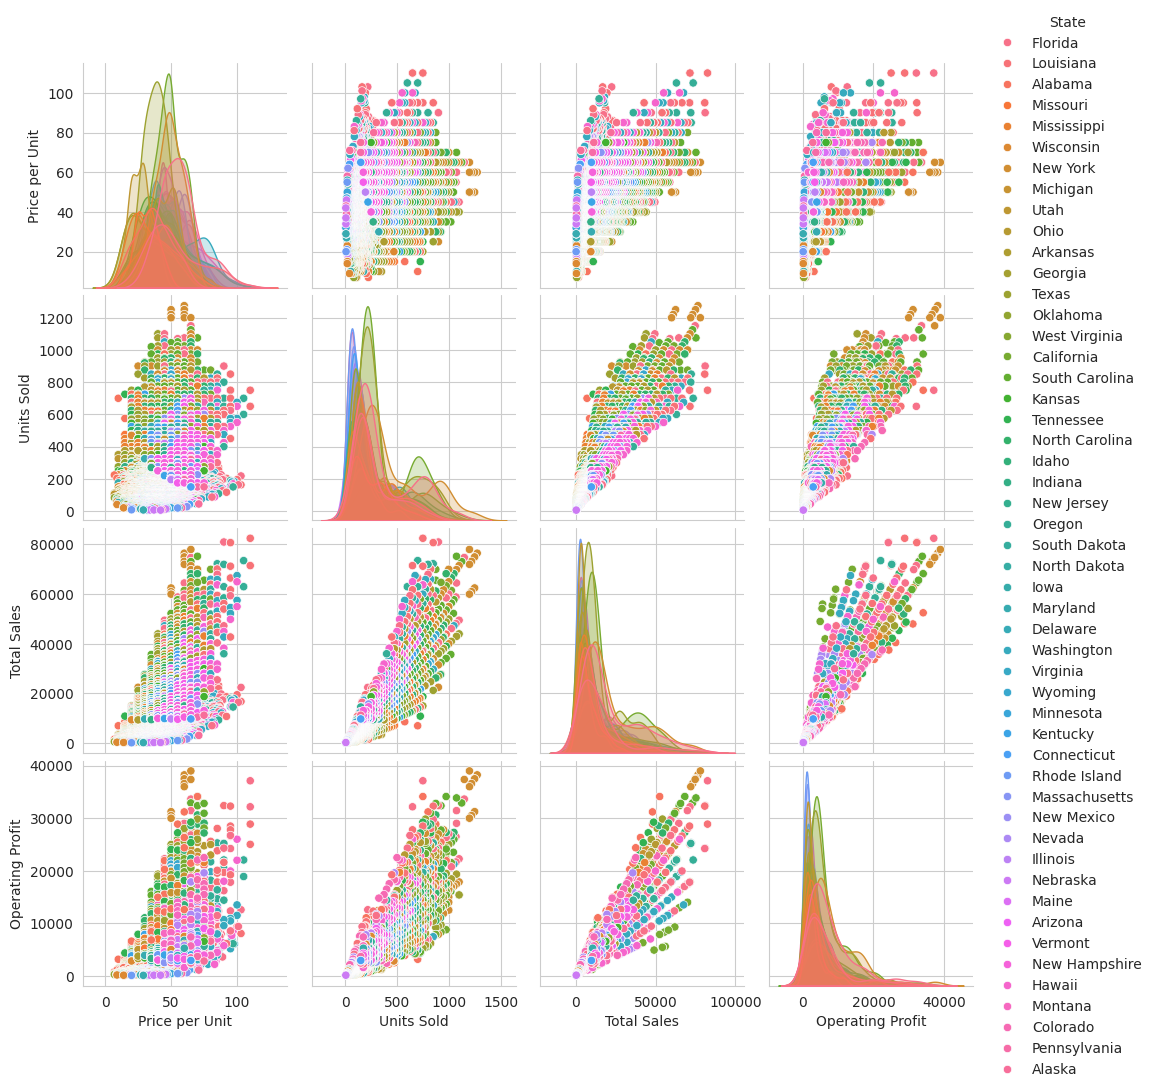

In [ ]:
# Membentuk plot
sns.pairplot(data, hue="State")
plt.savefig('MULTI_parplot hue State.jpeg', format='jpeg')
plt.show()

#### Hubungan Setiap Pasangan Variabel Numerik Pada Dataset Berdasarkan City

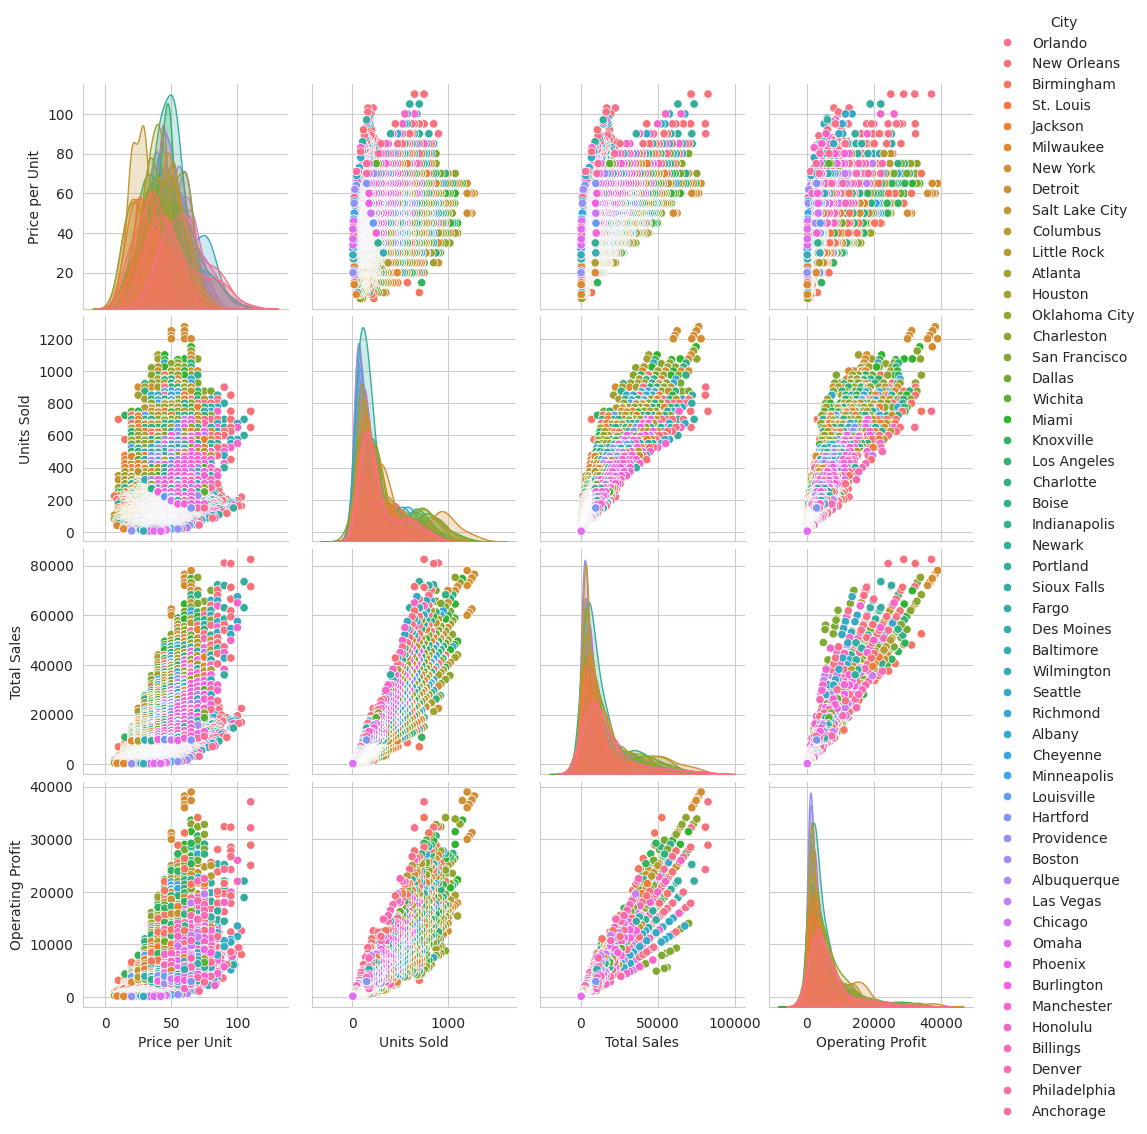

In [ ]:
# Membentuk plot
sns.pairplot(data, hue="City")
plt.savefig('MULTI_parplot hue City.jpeg', format='jpeg')
plt.show()

#### Hubungan Setiap Pasangan Variabel Numerik Pada Dataset Berdasarkan Product

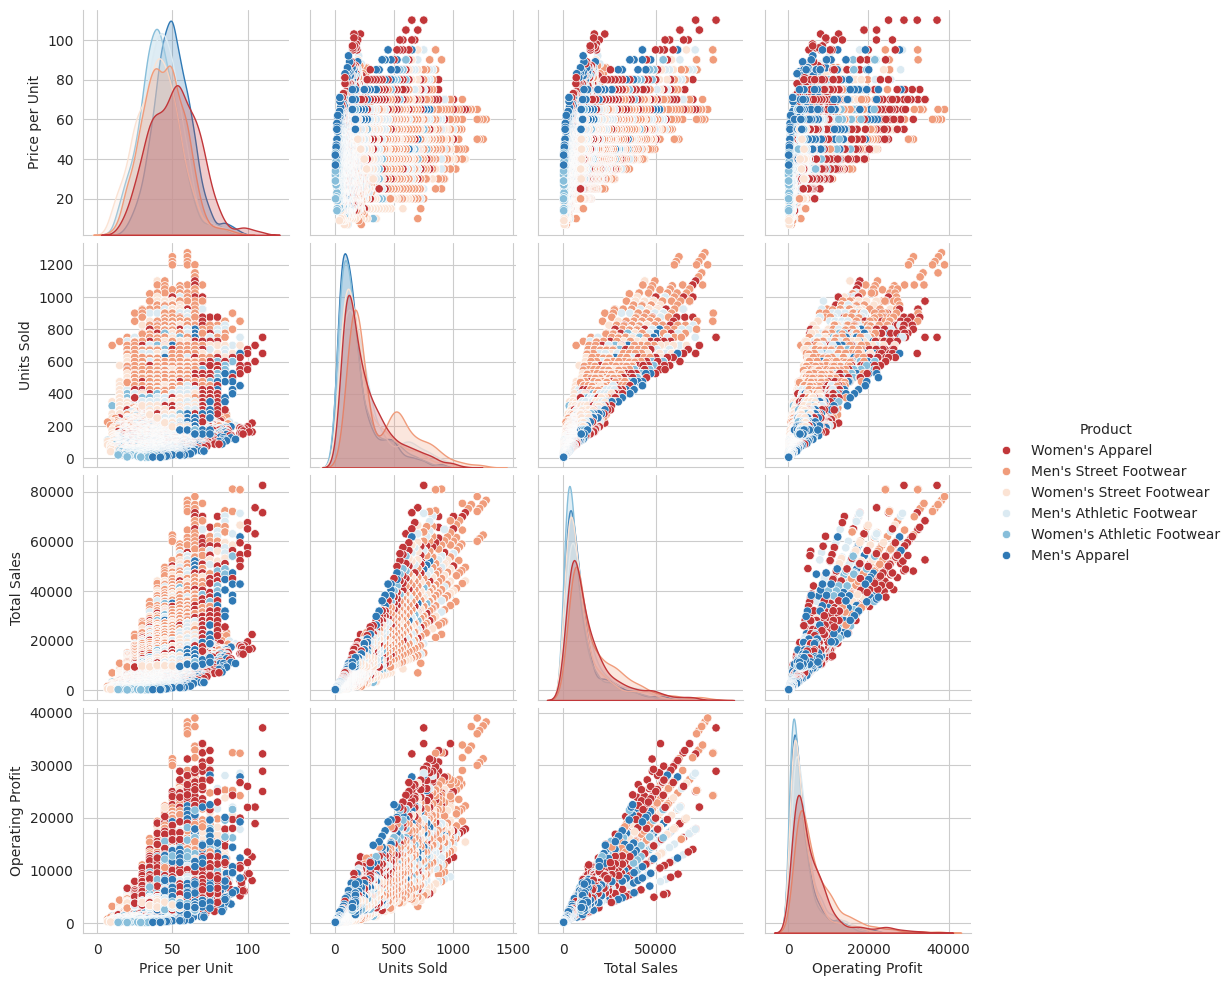

In [ ]:
# Membentuk plot
sns.pairplot(data, hue="Product")
plt.savefig('MULTI_parplot hue Product.jpeg', format='jpeg')
plt.show()

#### Hubungan Setiap Pasangan Variabel Numerik Pada Dataset Berdasarkan Sales Method

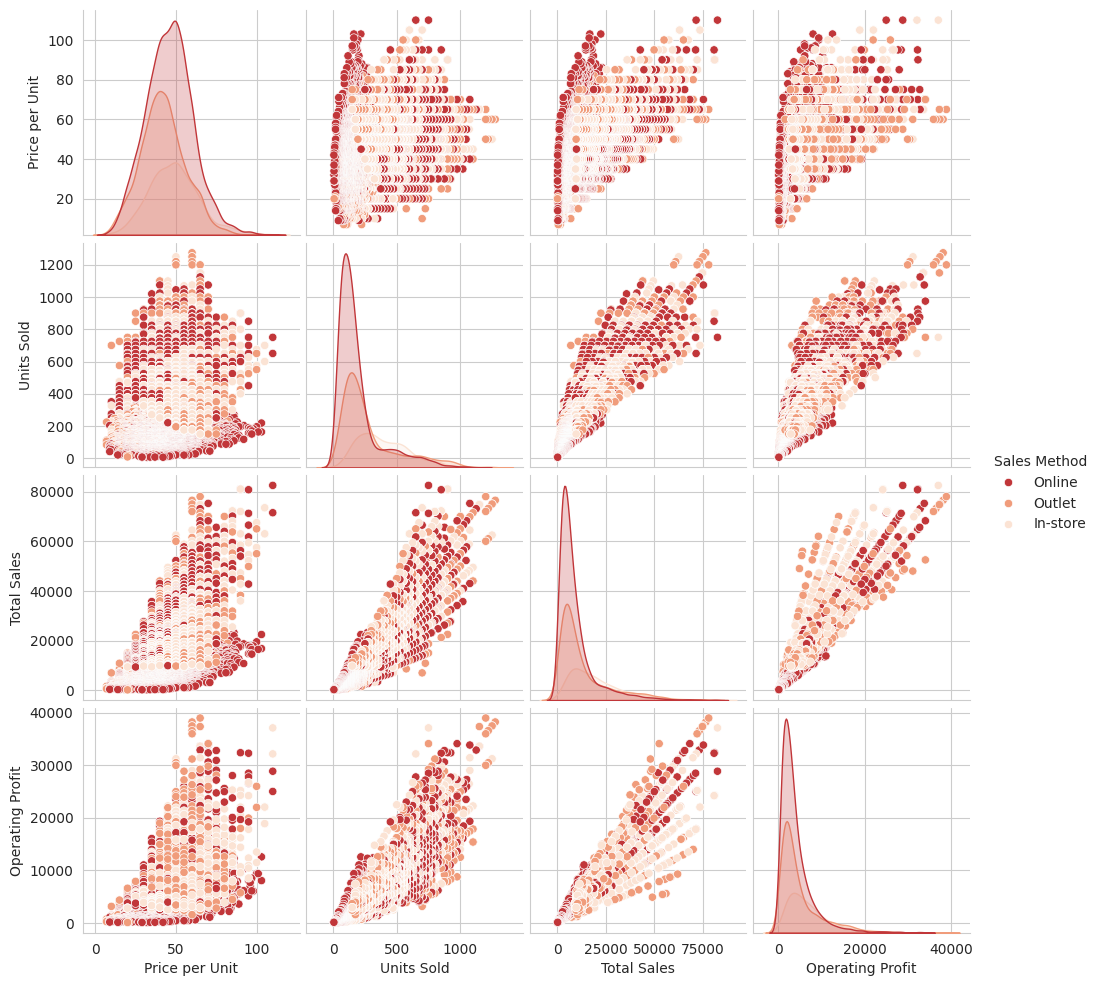

In [ ]:
# Membentuk plot
sns.pairplot(data, hue="Sales Method")
plt.savefig('MULTI_parplot hue Sales Method.jpeg', format='jpeg')
plt.show()

#### Hubungan Setiap Pasangan Variabel Numerik Pada Dataset Berdasarkan Season

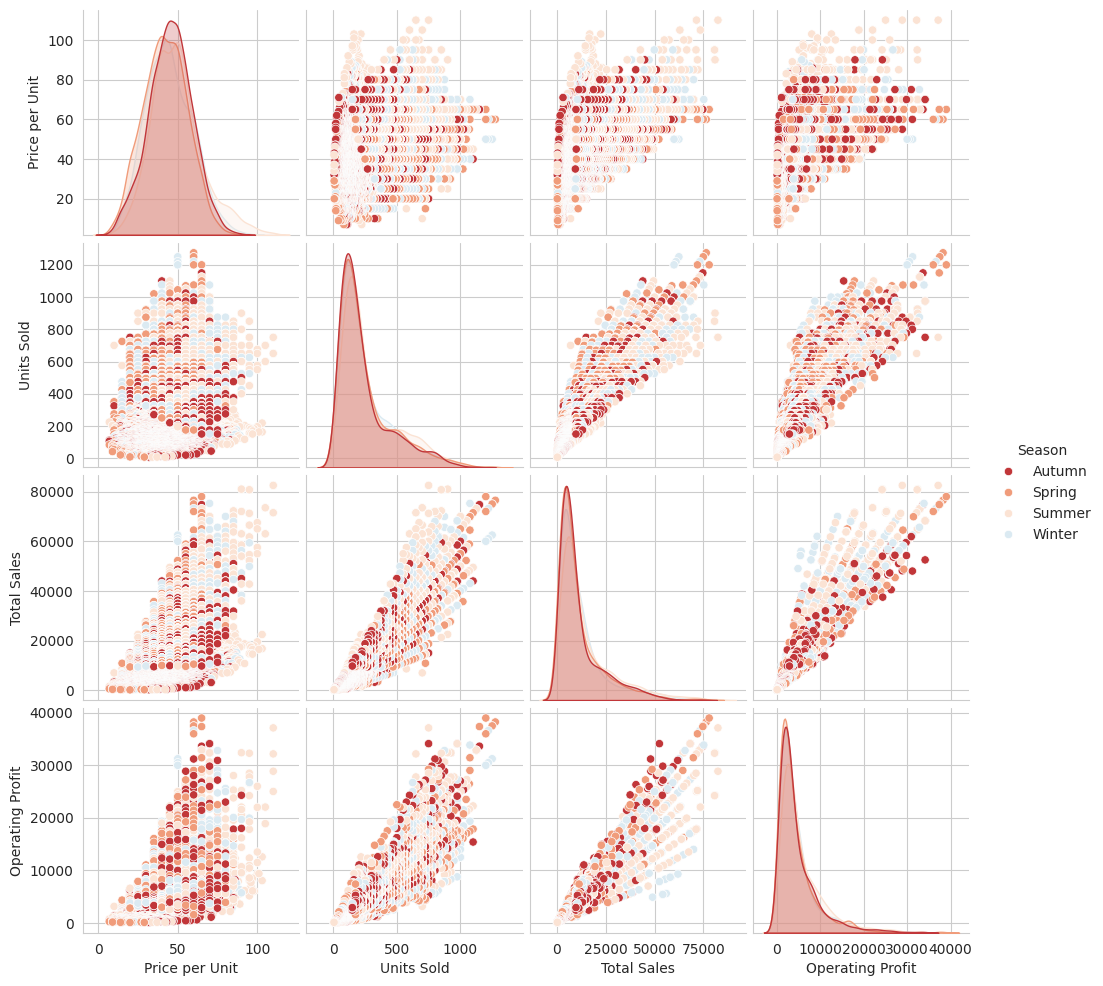

In [ ]:
# Membentuk plot
sns.pairplot(data, hue="Season")
plt.savefig('MULTI_parplot hue Season.jpeg', format='jpeg')
plt.show()

#### Hubungan Korelasi Setiap Variabel Numerik

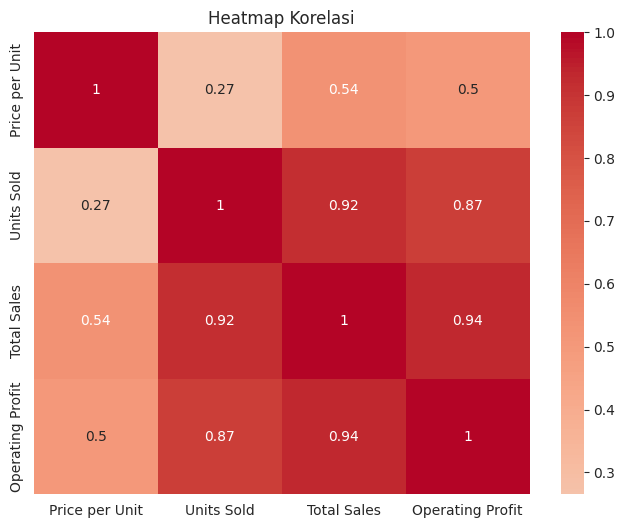

In [ ]:
# Memilih hanya kolom numerik
data_numeric = data.select_dtypes(include=[float, int])

# Menghitung matriks korelasi
correlation_matrix = data_numeric.corr()

# Membuat heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap Korelasi')

plt.savefig('MULTI_heatmap numerik.jpeg', format='jpeg')
plt.show()

## Prediksi

### Prophet

In [ ]:
import pandas as pd
from prophet import Prophet

# Pastikan tidak ada nilai NaN dalam data yang penting
data.dropna(subset=['Invoice Date', 'Total Sales', 'Operating Profit'], inplace=True)

def fit_predict_prophet(group, periods=60):
    if group.shape[0] < 2:
        return None

    df = group[['Invoice Date', 'Total Sales', 'Operating Profit']].copy()
    df['Invoice Date'] = pd.to_datetime(df['Invoice Date'])
    df = df.rename(columns={'Invoice Date': 'ds', 'Total Sales': 'y'})

    # Handle case where y contains NaN or infinite values
    if df['y'].isna().any() or not df['y'].notna().all():
        return None

    try:
        # Prophet model for Total Sales
        model_sales = Prophet()
        model_sales.fit(df[['ds', 'y']])

        # Make future dataframe
        future_dates = model_sales.make_future_dataframe(periods=periods, freq='M')

        # Predict Total Sales
        forecast_sales = model_sales.predict(future_dates)
        forecast_sales = forecast_sales[['ds', 'yhat']].rename(columns={'yhat': 'Predicted Total Sales'})

        # Prophet model for Operating Profit
        df = df.rename(columns={'y': 'Total Sales', 'Operating Profit': 'y'})
        model_profit = Prophet()
        model_profit.fit(df[['ds', 'y']])

        # Predict Operating Profit
        forecast_profit = model_profit.predict(future_dates)
        forecast_profit = forecast_profit[['ds', 'yhat']].rename(columns={'yhat': 'Predicted Operating Profit'})

        # Combine results
        forecast = forecast_sales.merge(forecast_profit, on='ds')

        df = df.rename(columns={'y': 'Operating Profit'})

        # Filter the DataFrame for rows where 'Total Sales' > 0
        positive_sales_df = df[df['Total Sales'] > 0]
        # Find the row index with the minimum positive 'Total Sales'
        min_positive_sales_idx = positive_sales_df['Total Sales'].idxmin()
        # Get the row corresponding to the minimum positive 'Total Sales'
        min_positive_sales_row = positive_sales_df.loc[min_positive_sales_idx]

        # Get the minimum positive Total Sales and its corresponding Operating Profit
        min_positive_sales = min_positive_sales_row['Total Sales']
        min_positive_profit = min_positive_sales_row['Operating Profit']

        # Adjust Total Sales predictions based on the conditions
        def adjust_total_sales(row):
            if row['Predicted Total Sales'] <= 0:
                if row['Predicted Operating Profit'] >= 0:
                    if row['Predicted Operating Profit'] > min_positive_profit:
                        return max(min_positive_sales + (row['Predicted Operating Profit'] - min_positive_profit), 0)
                    elif row['Predicted Operating Profit'] < min_positive_profit:
                        return max(min_positive_sales - (min_positive_profit - row['Predicted Operating Profit']), 0)
                    else:
                        return min_positive_sales
                else:
                    return max(min_positive_sales - abs(row['Predicted Operating Profit']), 0)
            return row['Predicted Total Sales']

        forecast['Predicted Total Sales'] = forecast.apply(adjust_total_sales, axis=1)

        return forecast

    except RuntimeError as e:
        print(f"RuntimeError: {e}")
        return None

result_list = []

# Group by Sales Method, Region, Retailer, and Product
grouped = data.groupby(['Sales Method', 'Region', 'Retailer', 'Product'])

for name, group in grouped:
    forecast = fit_predict_prophet(group)
    if forecast is not None:
        # Add grouping columns to forecast
        forecast['Sales Method'] = name[0]
        forecast['Region'] = name[1]
        forecast['Retailer'] = name[2]
        forecast['Product'] = name[3]

        # Append to result list
        result_list.append(forecast)

# Concatenate all results into a single DataFrame
if result_list:
    result = pd.concat(result_list, ignore_index=True)
else:
    result = pd.DataFrame()

result = result[['ds', 'Sales Method', 'Region', 'Retailer', 'Product', 'Predicted Total Sales', 'Predicted Operating Profit']]
result = result.rename(columns={'ds': 'Invoice Date'})

result.head()


Streaming output truncated to the last 5000 lines.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp36wd6ndh/vh94v4xf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80071', 'data', 'file=/tmp/tmp36wd6ndh/5obsvxwg.json', 'init=/tmp/tmp36wd6ndh/vh94v4xf.json', 'output', 'file=/tmp/tmp36wd6ndh/prophet_modelwfn4kdcp/prophet_model-20240621140858.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:08:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:08:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp36wd6ndh/nf

RuntimeError: Error during optimization! Command '/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin random seed=53184 data file=/tmp/tmp36wd6ndh/mk3guymu.json init=/tmp/tmp36wd6ndh/be4tnez_.json output file=/tmp/tmp36wd6ndh/prophet_modelnoiwu7x_/prophet_model-20240621141108.csv method=optimize algorithm=newton iter=10000' failed: console log output:

method = optimize
  optimize
    algorithm = newton
      newton
    jacobian = 0 (Default)
    iter = 10000
    save_iterations = 0 (Default)
id = 1 (Default)
data
  file = /tmp/tmp36wd6ndh/mk3guymu.json
init = /tmp/tmp36wd6ndh/be4tnez_.json
random
  seed = 53184
output
  file = /tmp/tmp36wd6ndh/prophet_modelnoiwu7x_/prophet_model-20240621141108.csv
  diagnostic_file =  (Default)
  refresh = 100 (Default)
  sig_figs = -1 (Default)
  profile_file = profile.csv (Default)
num_threads = 1 (Default)

Rejecting initial value:
  Error evaluating the log probability at the initial value.
Exception: normal_lpdf: Random v

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 0.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp36wd6ndh/bw9zah16.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp36wd6ndh/vx5hch8a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12752', 'data', 'file=/tmp/tmp36wd6ndh/bw9zah16.json', 'init=/tmp/tmp36wd6ndh/vx5hch8a.json', 'output', 'file=/tmp/tmp36wd6ndh/prophet_modelr0c9o1un/prophet_model-20240621141108.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:11:08 - cmdstanpy - INFO - Chain [1] start processing
IN

RuntimeError: Error during optimization! Command '/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin random seed=12752 data file=/tmp/tmp36wd6ndh/bw9zah16.json init=/tmp/tmp36wd6ndh/vx5hch8a.json output file=/tmp/tmp36wd6ndh/prophet_modelr0c9o1un/prophet_model-20240621141108.csv method=optimize algorithm=newton iter=10000' failed: console log output:

method = optimize
  optimize
    algorithm = newton
      newton
    jacobian = 0 (Default)
    iter = 10000
    save_iterations = 0 (Default)
id = 1 (Default)
data
  file = /tmp/tmp36wd6ndh/bw9zah16.json
init = /tmp/tmp36wd6ndh/vx5hch8a.json
random
  seed = 12752
output
  file = /tmp/tmp36wd6ndh/prophet_modelr0c9o1un/prophet_model-20240621141108.csv
  diagnostic_file =  (Default)
  refresh = 100 (Default)
  sig_figs = -1 (Default)
  profile_file = profile.csv (Default)
num_threads = 1 (Default)

Rejecting initial value:
  Error evaluating the log probability at the initial value.
Exception: normal_lpdf: Random v

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 4.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp36wd6ndh/iupj3na9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp36wd6ndh/vd5st0kr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96550', 'data', 'file=/tmp/tmp36wd6ndh/iupj3na9.json', 'init=/tmp/tmp36wd6ndh/vd5st0kr.json', 'output', 'file=/tmp/tmp36wd6ndh/prophet_modelkib0dkug/prophet_model-20240621141109.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:11:09 - cmdstanpy - INFO - Chain [1] start processing
IN

Invoice Date Sales Method   Region     Retailer        Product  \
0   2020-10-21     In-store  Midwest  Foot Locker  Men's Apparel   
1   2020-10-27     In-store  Midwest  Foot Locker  Men's Apparel   
2   2020-11-02     In-store  Midwest  Foot Locker  Men's Apparel   
3   2020-11-08     In-store  Midwest  Foot Locker  Men's Apparel   
4   2020-11-14     In-store  Midwest  Foot Locker  Men's Apparel   

   Predicted Total Sales  Predicted Operating Profit  
0            7633.833556                 2708.803670  
1            3195.684943                 1204.386189  
2            5563.936633                 2033.108433  
3            2968.653466                  988.127573  
4            6356.071268                 2296.280735

In [ ]:
result.to_csv('predicted_data_sales_profit.csv', index=False)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

start_date = data['Invoice Date'].min()
end_date = data['Invoice Date'].max()
filtered_result = result[(result['Invoice Date'] >= start_date) & (result['Invoice Date'] <= end_date)]

# Menggabungkan data aktual dengan hasil prediksi
merged_data = pd.merge(data, filtered_result, on='Invoice Date', how='inner')

# Menghitung metrik akurasi untuk Total Sales
mae_sales = mean_absolute_error(merged_data['Total Sales'], merged_data['Predicted Total Sales'])
rmse_sales = np.sqrt(mean_squared_error(merged_data['Total Sales'], merged_data['Predicted Total Sales']))

# Menghitung metrik akurasi untuk Operating Profit
mae_profit = mean_absolute_error(merged_data['Operating Profit'], merged_data['Predicted Operating Profit'])
rmse_profit = np.sqrt(mean_squared_error(merged_data['Operating Profit'], merged_data['Predicted Operating Profit']))

print(f'Mean Absolute Error (MAE) for Total Sales: {mae_sales:.2f}')
print(f'Root Mean Squared Error (RMSE) for Total Sales: {rmse_sales:.2f}')
print()

print(f'Mean Absolute Error (MAE) for Operating Profit: {mae_profit:.2f}')
print(f'Root Mean Squared Error (RMSE) for Operating Profit: {rmse_profit:.2f}')


Mean Absolute Error (MAE) for Total Sales: 10312.91
Root Mean Squared Error (RMSE) for Total Sales: 15362.11

Mean Absolute Error (MAE) for Operating Profit: 3870.21
Root Mean Squared Error (RMSE) for Operating Profit: 6161.20


## Old

### Prophet

In [ ]:
# import pandas as pd
# from prophet import Prophet

# # Pastikan tidak ada nilai NaN dalam data yang penting
# data.dropna(subset=['Invoice Date', 'Total Sales', 'Operating Profit'], inplace=True)

# def fit_predict_prophet(group, periods=60):
#     if group.shape[0] < 2:
#         return None

#     df = group[['Invoice Date', 'Total Sales', 'Operating Profit']].copy()
#     df['Invoice Date'] = pd.to_datetime(df['Invoice Date'])
#     df = df.rename(columns={'Invoice Date': 'ds', 'Total Sales': 'y'})

#     # Handle case where y contains NaN or infinite values
#     if df['y'].isna().any() or not df['y'].notna().all():
#         return None

#     try:
#         # Prophet model for Total Sales
#         model_sales = Prophet()
#         model_sales.fit(df[['ds', 'y']])

#         # Make future dataframe
#         future_dates = model_sales.make_future_dataframe(periods=periods, freq='M')

#         # Predict Total Sales
#         forecast_sales = model_sales.predict(future_dates)
#         forecast_sales = forecast_sales[['ds', 'yhat']].rename(columns={'yhat': 'Predicted Total Sales'})

#         # Ensure Total Sales predictions are not negative
#         forecast_sales['Predicted Total Sales'] = forecast_sales['Predicted Total Sales'].apply(lambda x: max(0, x))

#         # Prophet model for Operating Profit
#         df = df.rename(columns={'y': 'Total Sales', 'Operating Profit': 'y'})
#         model_profit = Prophet()
#         model_profit.fit(df[['ds', 'y']])

#         # Predict Operating Profit
#         forecast_profit = model_profit.predict(future_dates)
#         forecast_profit = forecast_profit[['ds', 'yhat']].rename(columns={'yhat': 'Predicted Operating Profit'})

#         # Combine results
#         forecast = forecast_sales.merge(forecast_profit, on='ds')
#         return forecast

#     except RuntimeError as e:
#         print(f"RuntimeError: {e}")
#         return None

# result_list = []

# # Group by Sales Method, Region, Retailer, and Product
# grouped = data.groupby(['Sales Method', 'Region', 'Retailer', 'Product'])

# for name, group in grouped:
#     forecast = fit_predict_prophet(group)
#     if forecast is not None:
#         # Add grouping columns to forecast
#         forecast['Sales Method'] = name[0]
#         forecast['Region'] = name[1]
#         forecast['Retailer'] = name[2]
#         forecast['Product'] = name[3]

#         # Append to result list
#         result_list.append(forecast)

# # Concatenate all results into a single DataFrame
# if result_list:
#     result = pd.concat(result_list, ignore_index=True)
# else:
#     result = pd.DataFrame()

# result = result[['ds', 'Sales Method', 'Region', 'Retailer', 'Product', 'Predicted Total Sales', 'Predicted Operating Profit']]
# result = result.rename(columns={'ds': 'Invoice Date'})

# result.head()

In [ ]:
# data2 = data.copy()

# from prophet import Prophet

# data2 = data2[['Invoice Date', 'Retailer', 'Total Sales']]

# # Memastikan tidak ada missing values
# data2 = data2.dropna()

# # Membuat dictionary untuk menyimpan model dan prediksi
# retailer_models = {}
# retailer_forecasts = {}

# # Mengelompokkan data berdasarkan retailer
# retailers = data2['Retailer'].unique()

# for retailer in retailers:
#     # Filter data untuk setiap retailer
#     retailer_data = data2[data2['Retailer'] == retailer]

#     # Mengagregasi penjualan berdasarkan tanggal
#     retailer_data = retailer_data.groupby('Invoice Date').agg({'Total Sales': 'sum'}).reset_index()
#     retailer_data = retailer_data.rename(columns={'Invoice Date': 'ds', 'Total Sales': 'y'})

#     # Membuat dan melatih model Prophet
#     model = Prophet()
#     model.fit(retailer_data)

#     # Membuat DataFrame untuk prediksi selama 5 tahun ke depan
#     future = model.make_future_dataframe(periods=5*365)

#     # Melakukan prediksi
#     forecast = model.predict(future)

#     # Menyimpan model dan hasil prediksi
#     retailer_models[retailer] = model
#     retailer_forecasts[retailer] = forecast

# for retailer in retailers:
#     # Mendapatkan model dan hasil prediksi
#     model = retailer_models[retailer]
#     forecast = retailer_forecasts[retailer]

#     # Plot hasil prediksi
#     fig = model.plot(forecast)
#     plt.title(f'Forecast for {retailer}')
#     plt.xlabel('Date')
#     plt.ylabel('Total Sales')
#     plt.show()

#     # Plot komponen
#     fig = model.plot_components(forecast)
#     plt.title(f'Components for {retailer}')
#     plt.show()

### Linear Regression

In [ ]:
# data1 = data.copy()

# # Dictionary untuk menyimpan map konversi
# conversion_maps = {}

# # Membuat fungsi untuk mengonversi nilai berdasarkan tingkat kepentingannya
# def convert_by_importance(column):
#     frequencies = column.value_counts()
#     importance = {value: i+1 for i, value in enumerate(frequencies.index)}
#     conversion_maps[column.name] = importance  # Menyimpan map konversi untuk kolom tertentu
#     return column.map(importance)

# # Mengonversi semua kolom bertipe data string
# for col in data1.columns:
#     if data1[col].dtype == 'object':
#         data1[col] = convert_by_importance(data1[col])

# # Menampilkan map konversi
# for col, conversion_map in conversion_maps.items():
#     print(f"Conversion Map for column '{col}':")
#     print(conversion_map)
#     print()


In [ ]:
# season_mapping = {
#     'Winter': 1,
#     'Spring': 2,
#     'Summer': 3,
#     'Autumn': 4
# }

# data1['Season'] = data1['Season'].map(season_mapping)

In [ ]:
# data1['Day'] = data1['Day'].astype(int)
# data1['Month'] = data1['Month'].astype(int)
# data1['Year'] = data1['Year'].astype(int)
# data1['Season'] = data1['Season'].astype(int)

In [ ]:
# data1.info()

In [ ]:
# data1 = data1.rename(columns={
#     'Retailer': 'retailer',
#     'Invoice Date': 'invoice_date',
#     'Region': 'region',
#     'State': 'state',
#     'City': 'city',
#     'Product': 'product',
#     'Price per Unit': 'price_per_unit',
#     'Units Sold': 'units_sold',
#     'Total Sales': 'total_sales',
#     'Operating Profit': 'operating_profit',
#     'Sales Method': 'sales_method',
#     'Month': 'month',
#     'Year': 'year',
#     'Day': 'day',
#     "Season": 'season'
# })
# data1.info()

In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error, r2_score
# import statsmodels.api as sm
# import statsmodels.formula.api as smf
# import numpy as np
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# import itertools

In [ ]:
# data1.info()

In [ ]:
# alpha = 0.05
# independent_vars = ['retailer', 'region', 'state', 'city', 'product',
#        'price_per_unit', 'units_sold', 'operating_profit',
#        'sales_method', 'month', 'year', 'day', 'season']
# summary_df = pd.DataFrame(columns=['F', 'p-value', 'S', 'R^2(adj)',
#                                    'VIF retailer',
#                                    'VIF region',
#                                    'VIF state',
#                                    'VIF city',
#                                    'VIF product',
#                                    'VIF price_per_unit',
#                                    'VIF units_sold',
#                                    'VIF operating_profit',
#                                    'VIF sales_method',
#                                    'VIF month',
#                                    'VIF year',
#                                    'VIF day',
#                                    'VIF season'
#                                    ])
# vif_mapping = {
#     'retailer': 'VIF retailer',
#     'region': 'VIF region',
#     'state': 'VIF state',
#     'city': 'VIF city',
#     'product': 'VIF product',
#     'price_per_unit': 'VIF price_per_unit',
#     'units_sold': 'VIF units_sold',
#     'operating_profit': 'VIF operating_profit',
#     'sales_method': 'VIF sales_method',
#     'month': 'VIF month',
#     'year': 'VIF year',
#     'day': 'VIF day',
#     'season': 'VIF season'
# }

# num_rows = 0

In [ ]:
# correlation_matrix = data1[['total_sales'] + independent_vars].corr(method='pearson')
# plt.figure(figsize=(8, 7.5))
# sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
# plt.title('Heatmap of Pearson Correlation')
# plt.tight_layout()
# plt.show()

#### Simple Linear Regression

In [ ]:
# for single_var in independent_vars:
#     formula = f"total_sales ~ {single_var}"
#     result = smf.ols(formula=formula, data=data1).fit()
#     num_rows = len(summary_df)
#     summary_df.loc[num_rows] = [result.fvalue, result.f_pvalue, np.sqrt(result.mse_resid), result.rsquared_adj, None, None, None, None, None, None, None, None, None, None, None, None, None]

#     # Menggunakan mapping untuk menetapkan nilai VIF ke kolom yang sesuai
#     if single_var in vif_mapping:
#         summary_df.loc[num_rows, vif_mapping[single_var]] = 1


#### Multiple Linear Regression

In [ ]:
# for r in range(1, len(independent_vars) + 1):
#     for combo in itertools.combinations(independent_vars, r):
#         if len(combo) > 1:
#             formula = "total_sales ~ " + " + ".join(combo)
#             result = smf.ols(formula=formula, data=data1).fit()
#             vif = [variance_inflation_factor(result.model.exog, i) for i in range(1, result.model.exog.shape[1])]
#             vif_df = pd.DataFrame({'VIF': vif}, index=combo)
#             num_rows = len(summary_df)
#             summary_df.loc[num_rows] = [result.fvalue, result.f_pvalue, np.sqrt(result.mse_resid), result.rsquared_adj, None, None, None, None, None, None, None, None, None, None, None, None, None]
#             for col_name in vif_df.index:
#                 if col_name in combo:
#                     if col_name in vif_mapping:
#                         summary_df.loc[num_rows, vif_mapping[col_name]] = vif_df.loc[col_name, 'VIF']


#### Model Regresi Liner (Berdasarkan Variabel yang Terpilih)

In [ ]:
# # Batas untuk mendeteksi adanya multikolinieritas: VIF > 5
# summary_df.sort_values(by=['F', 'R^2(adj)', 'S'], ascending=[False, False, True])

In [ ]:
# # Pisahkan fitur dan target
# X = data1[['year']]
# y = data1['total_sales']

# # Membagi data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Membuat dan melatih model
# model = LinearRegression()
# model.fit(X_train, y_train)

# # Evaluasi model
# y_pred = model.predict(X_test)
# print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
# print(f'R-squared: {r2_score(y_test, y_pred)}')

# print(y_pred)

In [ ]:
# data1 = data.copy()

# # Pra-pemrosesan data
# data1 = pd.get_dummies(data1, columns=['Retailer', 'Region', 'State', 'City', 'Product', 'Sales Method', 'Season'], drop_first=True)

# # Pisahkan fitur dan target
# X = data1.drop(columns=['Total Sales', 'Operating Profit', 'Month', 'Year', 'Day', 'Invoice Date'])
# y = data1['Total Sales']

# # Membagi data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Membuat dan melatih model
# model = LinearRegression()
# model.fit(X_train, y_train)

# # Evaluasi model
# y_pred = model.predict(X_test)
# print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
# print(f'R-squared: {r2_score(y_test, y_pred)}')

# # # Melihat koefisien model
# # coef_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
# # print(coef_df)

### Random Forest

In [ ]:
# from sklearn.ensemble import RandomForestRegressor

# X = data1[['month']]
# y = data1['total_sales']

# # 4. Membagi Data menjadi Set Pelatihan dan Pengujian
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # 5. Membuat dan Melatih Model Random Forest
# model = RandomForestRegressor(n_estimators=100, random_state=42)
# model.fit(X_train, y_train)

# # 6. Melakukan Prediksi
# y_pred = model.predict(X_test)

# # 7. Evaluasi Model
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print(f'Mean Squared Error: {mse}')
# print(f'R-squared: {r2}')

In [ ]:
# from sklearn.ensemble import RandomForestRegressor

# data1 = data.copy()

# # 2. Mengubah Variabel Kategori Menjadi Dummy Variables
# data1 = pd.get_dummies(data1, columns=['Retailer', 'Region', 'State', 'City', 'Product', 'Sales Method', 'Season'], drop_first=True)

# # 3. Memisahkan Data menjadi Fitur dan Target
# X = data1.drop(columns=['Total Sales', 'Operating Profit', 'Month', 'Year', 'Day', 'Invoice Date'])
# y = data1['Total Sales']

# # 4. Membagi Data menjadi Set Pelatihan dan Pengujian
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # 5. Membuat dan Melatih Model Random Forest
# model = RandomForestRegressor(n_estimators=100, random_state=42)
# model.fit(X_train, y_train)

# # 6. Melakukan Prediksi
# y_pred = model.predict(X_test)

# # 7. Evaluasi Model
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print(f'Mean Squared Error: {mse}')
# print(f'R-squared: {r2}')

### LSTM

In [ ]:
# data3 = data.copy()

# import numpy as np
# from sklearn.preprocessing import MinMaxScaler
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense

# # Memilih kolom yang diperlukan
# data3 = data3[['Invoice Date', 'Retailer', 'Total Sales']]

# data3 = data3.dropna()

# # Mengagregasi penjualan berdasarkan tanggal dan retailer
# data3 = data3.groupby(['Retailer', 'Invoice Date']).agg({'Total Sales': 'sum'}).reset_index()

# # Membuat dan melatih model LSTM untuk setiap kelompok retailer
# retailers = data3['Retailer'].unique()
# for retailer in retailers:
#     # Filter data untuk setiap retailer
#     retailer_data = data3[data3['Retailer'] == retailer]

#     # Menyiapkan data
#     dates = retailer_data['Invoice Date'].values
#     sales = retailer_data['Total Sales'].values.reshape(-1, 1)

#     # Normalisasi data
#     scaler = MinMaxScaler(feature_range=(0, 1))
#     sales_scaled = scaler.fit_transform(sales)

#     # Membagi data menjadi data latih dan data uji
#     train_size = int(len(sales_scaled) * 0.8)
#     train_data, test_data = sales_scaled[:train_size], sales_scaled[train_size:]

#     # Mengonversi data latih dan data uji menjadi dataset sesuai dengan timestep
#     def create_dataset(dataset, time_steps=1):
#         X, Y = [], []
#         for i in range(len(dataset) - time_steps):
#             a = dataset[i:(i + time_steps), 0]
#             X.append(a)
#             Y.append(dataset[i + time_steps, 0])
#         return np.array(X), np.array(Y)

#     time_steps = 10
#     X_train, Y_train = create_dataset(train_data, time_steps)
#     X_test, Y_test = create_dataset(test_data, time_steps)

#     # Reshape data untuk LSTM [samples, time steps, features]
#     X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
#     X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

#     # Membuat model LSTM
#     model = Sequential()
#     model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
#     model.add(LSTM(units=50))
#     model.add(Dense(units=1))

#     # Kompilasi model
#     model.compile(optimizer='adam', loss='mean_squared_error')

#     # Melatih model
#     model.fit(X_train, Y_train, epochs=100, batch_size=32)

#     # Melakukan prediksi
#     train_predict = model.predict(X_train)
#     test_predict = model.predict(X_test)
#     test_predict = scaler.inverse_transform(test_predict)

#     # Plot hasil prediksi
#     plt.figure(figsize=(10, 6))
#     plt.plot(dates[:train_size], sales[:train_size], label='Training Data')
#     plt.plot(dates[train_size+time_steps:], sales[train_size+time_steps:], label='Actual Data')
#     plt.plot(dates[train_size+time_steps:], test_predict, label='Predicted Data')
#     plt.title(f'Sales Prediction for {retailer}')
#     plt.xlabel('Date')
#     plt.ylabel('Total Sales')
#     plt.legend()
#     plt.show()

In [ ]:
# data3 = data.copy()

# import numpy as np
# from sklearn.preprocessing import MinMaxScaler
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense

# # Memilih kolom yang diperlukan
# data3 = data3[['Invoice Date', 'Retailer', 'Total Sales']]

# # Mengagregasi penjualan berdasarkan tanggal dan retailer
# data3 = data3.groupby(['Retailer', 'Invoice Date']).agg({'Total Sales': 'sum'}).reset_index()

# # Membuat dan melatih model LSTM untuk setiap kelompok retailer
# retailers = data3['Retailer'].unique()
# for retailer in retailers:
#     # Filter data untuk setiap retailer
#     retailer_data = data3[data3['Retailer'] == retailer]

#     # Menyiapkan data
#     dates = retailer_data['Invoice Date'].values
#     sales = retailer_data['Total Sales'].values.reshape(-1, 1)

#     # Normalisasi data
#     scaler = MinMaxScaler(feature_range=(0, 1))
#     sales_scaled = scaler.fit_transform(sales)

#     # Membagi data menjadi data latih dan data uji
#     time_steps = 10
#     X, Y = [], []
#     for i in range(len(sales_scaled) - time_steps):
#         X.append(sales_scaled[i:(i + time_steps), 0])
#         Y.append(sales_scaled[i + time_steps, 0])
#     X, Y = np.array(X), np.array(Y)

#     # Reshape data untuk LSTM [samples, time steps, features]
#     X = X.reshape(X.shape[0], X.shape[1], 1)

#     # Membuat model LSTM
#     model = Sequential()
#     model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
#     model.add(LSTM(units=50))
#     model.add(Dense(units=1))

#     # Kompilasi model
#     model.compile(optimizer='adam', loss='mean_squared_error')

#     # Melatih model
#     model.fit(X, Y, epochs=100, batch_size=32, verbose=0)

#     # Melakukan prediksi untuk 5 tahun ke depan
#     future_dates = pd.date_range(start=max(dates) + pd.Timedelta(days=1), periods=5*365, freq='D')
#     future_sales = np.copy(sales_scaled[-time_steps:, 0])  # Menggunakan data terakhir sebagai awal prediksi

#     for i in range(5*365):
#         X_pred = future_sales[-time_steps:].reshape(1, time_steps, 1)
#         pred = model.predict(X_pred)
#         future_sales = np.append(future_sales, pred)

#     # Mengembalikan data ke skala aslinya
#     future_sales = scaler.inverse_transform(future_sales.reshape(-1, 1))

#     # Plot hasil prediksi
#     plt.figure(figsize=(10, 6))
#     plt.plot(future_dates, future_sales[-5*365:], label='Predicted Data')
#     plt.title(f'Sales Prediction for {retailer} for the Next 5 Years')
#     plt.xlabel('Date')
#     plt.ylabel('Total Sales')
#     plt.legend()
#     plt.show()
